# **Machine Learning Across Breast Cancer Cell Lines**
*Katia Russo, Enrico Adamo, Matteo Colantoni, Sofia Lambro, Andrea Porta*

## - Introduction : background / aim / objective 


## - Material and Methods : 

## **Step 1** : Dataset Overview – *Understanding the Files*


In [1]:
import os
import sys
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Before diving into data exploration or modeling, it’s critical to understand what data is available, its origin, and how it’s structured.
We are working with two different single-cell RNA sequencing technologies applied to two breast cancer cell lines, *MCF7* and *HCC1806*:
- SmartSeq datasets:
    - Metadata files
    - Unfiltered raw data
    - Filtered and normalised data both for training and testing
- DropSeq datasets:
    - Filtered and normalised data both for training and testing

#### SmartSeq - metadata files:
These files provide information about the cells that have been analyzed with the SmartSeq technology, such as their position or their condition (normoxia/hypoxia). The rows are the files representing each single cell, while the columns are the features.

In [2]:
# Load the metadata files
mcf_meta = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for MCF7
print("MCF7 Metadata")
print("Shape:", mcf_meta.shape)
print("First 5 rows:")
mcf_meta.head(5)

MCF7 Metadata
Shape: (383, 8)
First 5 rows:


,Cell Line,Lane,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A10,Hypo,72,S28,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A11,Hypo,72,S29,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A12,Hypo,72,S30,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A1,Norm,72,S1,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,MCF7,output.STAR.1,A2,Norm,72,S2,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


In [3]:
# Load the metadata files
hcc_meta = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_MetaData.tsv", sep="\t", engine= "python", index_col=0)

# Inspect the shape and structure for HCC1806
print("\nHCC1806 Metadata")
print("Shape:", hcc_meta.shape)
print("First 5 rows:")
hcc_meta.head(5)


HCC1806 Metadata
Shape: (243, 8)
First 5 rows:


,Cell Line,PCR Plate,Pos,Condition,Hours,Cell name,PreprocessingTag,ProcessingComments
Filename,,,,,,,,
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,HCC1806,1,A10,Normo,24,S123,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,HCC1806,1,A12,Normo,24,S26,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,HCC1806,1,A1,Hypo,24,S97,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,HCC1806,1,A2,Hypo,24,S104,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,HCC1806,1,A3,Hypo,24,S4,Aligned.sortedByCoord.out.bam,"STAR,FeatureCounts"


Now we download the actual sequencing data. Understanding the shape and the content of the data will give us insights on the structure of the datasets we are going to use.

#### SmartSeq - MCF7:

In [4]:
# Load the filtered dataset with the SmartSeq technology
dfs_mcf_unfiltered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_filtered = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_train = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_mcf_test = pd.read_csv("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Unfiltered")
print("Dataframe dimension:", dfs_mcf_unfiltered.shape)
print("First column: ", dfs_mcf_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Filtered")
print("Dataframe dimension:", dfs_mcf_filtered.shape)
print("First column: ", dfs_mcf_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Training Dataset")
print("Dataframe dimension:", dfs_mcf_train.shape)
print("First column: ", dfs_mcf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfs_mcf_test.shape)
print("First column:", dfs_mcf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Unfiltered
Dataframe dimension: (22934, 383)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 20.10 MB

MCF7 Filtered
Dataframe dimension: (18945, 313)
First column:  WASH7P       0
MIR6859-1    0
WASH9P       1
OR4F29       0
MTND1P23     0
Name: output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 14.46 MB

MCF7 Training Dataset
Dataframe dimension: (3000, 250)
First column:  CYP1B1        343
CYP1B1-AS1    140
CYP1A1          0
NDRG1           0
DDIT4         386
Name: output.STAR.2_B3_Norm_S57_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.82 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 63)
First column: CYP1B1         492
CYP1B1-AS1     253
CYP1A1           0
NDRG1         1157
DDIT4         6805
Name: 1, dtype: int64
File dimension: 0.47 MB


#### SmartSeq - HCC1806

In [5]:
# Load the filtered dataset with the SmartSeq technology
dfs_hcc_unfiltered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_filtered = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_train = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfs_hcc_test = pd.read_csv("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for HCC1806
print("HCC1806 Unfiltered")
print("Dataframe dimension:", dfs_hcc_unfiltered.shape)
print("First column: ", dfs_hcc_unfiltered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Unfiltered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Filtered")
print("Dataframe dimension:", dfs_hcc_filtered.shape)
print("First column: ", dfs_hcc_filtered.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Data.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfs_hcc_train.shape)
print("First column: ", dfs_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfs_hcc_test.shape)
print("First column: ", dfs_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

HCC1806 Unfiltered
Dataframe dimension: (23396, 243)
First column:  WASH7P      0
CICP27      0
DDX11L17    0
WASH9P      0
OR4F29      2
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 13.89 MB

HCC1806 Filtered
Dataframe dimension: (19503, 227)
First column:  CICP27        0
DDX11L17      0
WASH9P        0
OR4F29        2
MTND1P23    250
Name: output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 11.39 MB

HCC1806 Training Dataset
Dataframe dimension: (3000, 182)
First column:  DDIT4        0
ANGPTL4     48
CALML5       0
KRT14      321
CCNB1      298
Name: output.STAR.PCRPlate1G12_Normoxia_S32_Aligned.sortedByCoord.out.bam, dtype: int64
File dimension: 1.31 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 45)
First column:  DDIT4        0
ANGPTL4      0
CALML5       0
KRT14      169
CCNB1      233
Name: 1, dtype: int64
File dimension: 0.34 MB


We checked content and dimension of all the datasets we had for the SmartSeq technology. We can notice that we have the cells on the columns, while the rows are the genes, in this way the datasets give us information on the gene expression profiles in the cells. Moreover, the number of columns of the unfiltered data matches the number of rows of the metadatas, so we have information on the condition of each cell.

#### DropSeq - MCF7:

In [6]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_mtf_train = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_mtf_test = pd.read_csv("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))

# Inspect the shape and structure for MCF7
print("MCF7 Training Dataset")
print("Dataframe dimension:", dfd_mtf_train.shape)
print("First column: ", dfd_mtf_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nMCF7 Testing Dataset")
print("Dataframe dimension:", dfd_mtf_test.shape)
print("First column: ", dfd_mtf_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/HCC1806_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")

MCF7 Training Dataset
Dataframe dimension: (3000, 14682)
First column:  H1-5       2
MALAT1     3
MT-RNR2    0
ARVCF      0
BCYRN1     0
Name: AAAAAACCCGGC_Normoxia, dtype: int64
File dimension: 84.37 MB

MCF7 Testing Dataset
Dataframe dimension: (3000, 3671)
First column:  H1-5       0
MALAT1     3
MT-RNR2    1
ARVCF      0
BCYRN1     2
Name: 1, dtype: int64
File dimension: 21.06 MB


#### DropSeq - HCC1806

In [7]:
# Load the filtered dataset with the DropSeqSeq technology
dfd_hcc_train = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))
dfd_hcc_test = pd.read_csv("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt", sep=r"\s+", engine= "python", index_col=0).rename(index=lambda x: x.strip('"')).rename(columns=lambda x: x.strip('"'))


# Inspect the shape and structure for HCC1806
print("\nHCC1806 Training Dataset")
print("Dataframe dimension:", dfd_hcc_train.shape)
print("First column: ", dfd_hcc_train.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_train.txt") / (1024 ** 2):.2f} MB")

print("\nHCC1806 Testing Dataset")
print("Dataframe dimension:", dfd_hcc_test.shape)
print("First column: ", dfd_hcc_test.iloc[ : , 0].head())
print(f"File dimension: {os.path.getsize("../Data/DropSeq/MCF7_Filtered_Normalised_3000_Data_test_anonim.txt") / (1024 ** 2):.2f} MB")


HCC1806 Training Dataset
Dataframe dimension: (3000, 21626)
First column:  MALAT1     1
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       4
Name: AAAAACCTATCG_Normoxia, dtype: int64
File dimension: 124.26 MB

HCC1806 Testing Dataset
Dataframe dimension: (3000, 5406)
First column:  MALAT1     0
MT-RNR2    0
NEAT1      0
H1-5       0
TFF1       3
Name: 1, dtype: int64
File dimension: 31.00 MB


At first sight we can immediately notice the difference in dimension between SmartSeq and DropSeq datasets, given by how each technology works.

For both technologies we have the training and testing datasets where have been retained exactly 3000 genes, probably the most variable ones. We are going to use them for training and testing our model.

The absence of metadata files for the DropSeq experiment make us think that we need two different approach when analyzing the different techniques, probably requiring unsupervised learning for the latter.

---

## **Step 2** : Exploratory Data Analysis

We now will go deeper in the analysis of the row data, exploring both cell lines independently.

### **MCF7 Cell Line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [8]:
dfs_mcf_unfiltered.isnull().values.any()

np.False_

#### - *Check Data Type*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [9]:
dfs_mcf_unfiltered.dtypes

output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam    int64
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam      int64
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      int64
                                                            ...  
output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam    int64
output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam    int64
Length: 383, dtype: object

In [10]:
(dfs_mcf_unfiltered.dtypes=="int64").all()

np.True_

This ensures that all the entries are integers.

### **2.2** Descriptive Statistic

#### **2.2.1** Per Cell

In [11]:
cell_stats_mcf = pd.DataFrame({
    'Mean': dfs_mcf_unfiltered.mean(),
    'Median': dfs_mcf_unfiltered.median(),
    'Std': dfs_mcf_unfiltered.std(),
    'Min': dfs_mcf_unfiltered.min(),
    'Max': dfs_mcf_unfiltered.max(),
    'Q1': dfs_mcf_unfiltered.quantile(0.25),
    'Q3': dfs_mcf_unfiltered.quantile(0.75),
})

print("Per-cell statistics:")
cell_stats_mcf.head()

Per-cell statistics:


,Mean,Median,Std,Min,Max,Q1,Q3
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,40.817651,0.0,465.709940,0,46744,0.0,17.0
output.STAR.1_A11_Hypo_S29_Aligned.sortedByCoord.out.bam,0.012253,0.0,0.207726,0,14,0.0,0.0
output.STAR.1_A12_Hypo_S30_Aligned.sortedByCoord.out.bam,86.442400,0.0,1036.572689,0,82047,0.0,5.0
output.STAR.1_A1_Norm_S1_Aligned.sortedByCoord.out.bam,1.024636,0.0,6.097362,0,289,0.0,0.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,14.531351,0.0,123.800530,0,10582,0.0,7.0


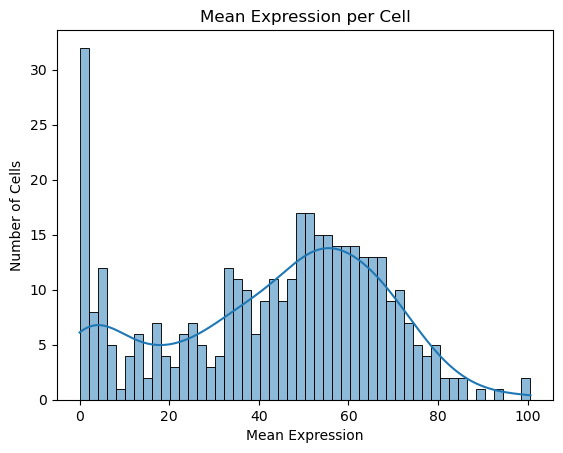

In [12]:
sns.histplot(cell_stats_mcf["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_8084/1729494827.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


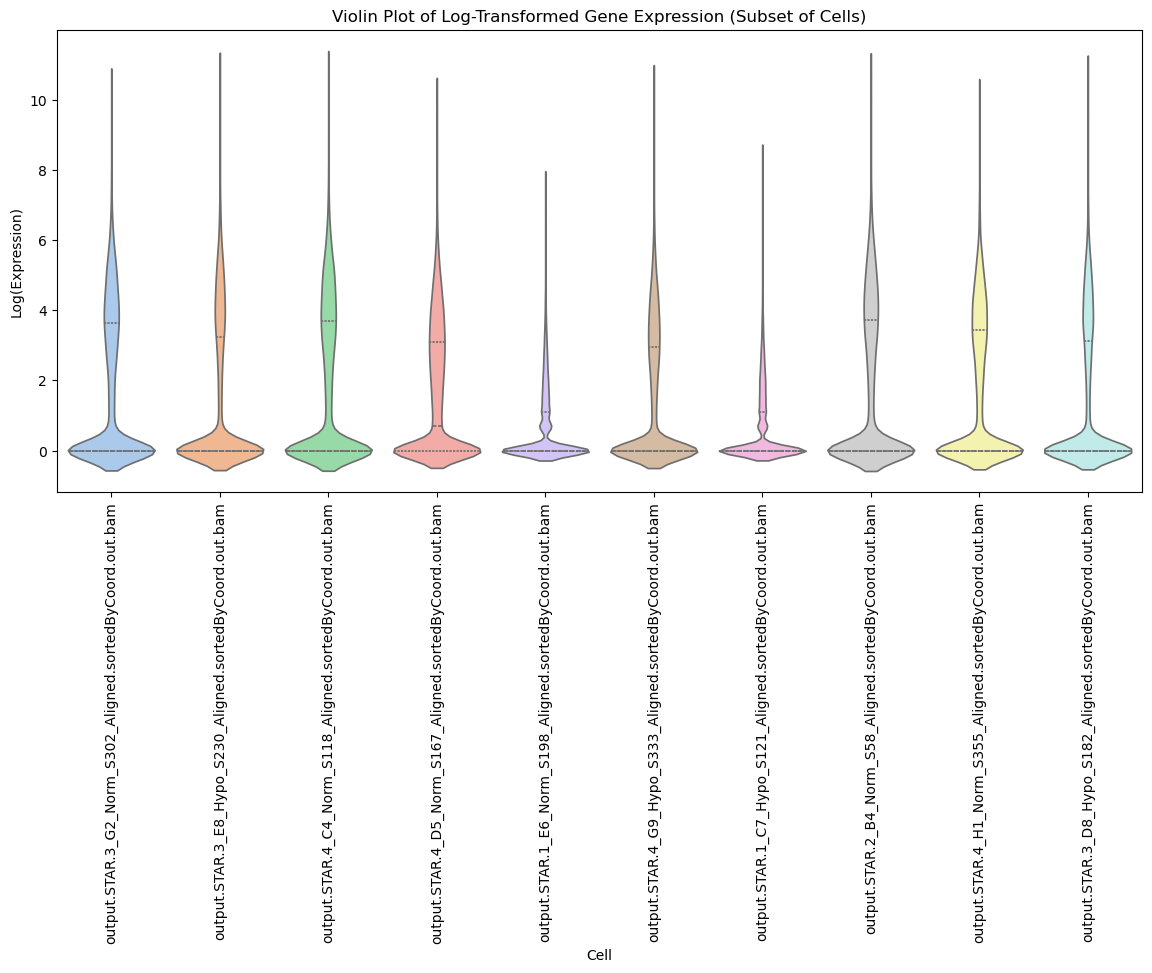

In [13]:
np.random.seed(42)  # per riproducibilità
subset_cells_mcf = np.random.choice(dfs_mcf_unfiltered.columns, size=10, replace=False)
dfs_mcf_subset = dfs_mcf_unfiltered[subset_cells_mcf]

# Log-transform: log(1 + x)
dfs_mcf_log = np.log1p(dfs_mcf_subset)

# Conversione in formato long per Seaborn
dfs_mcf_melted = dfs_mcf_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_mcf_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

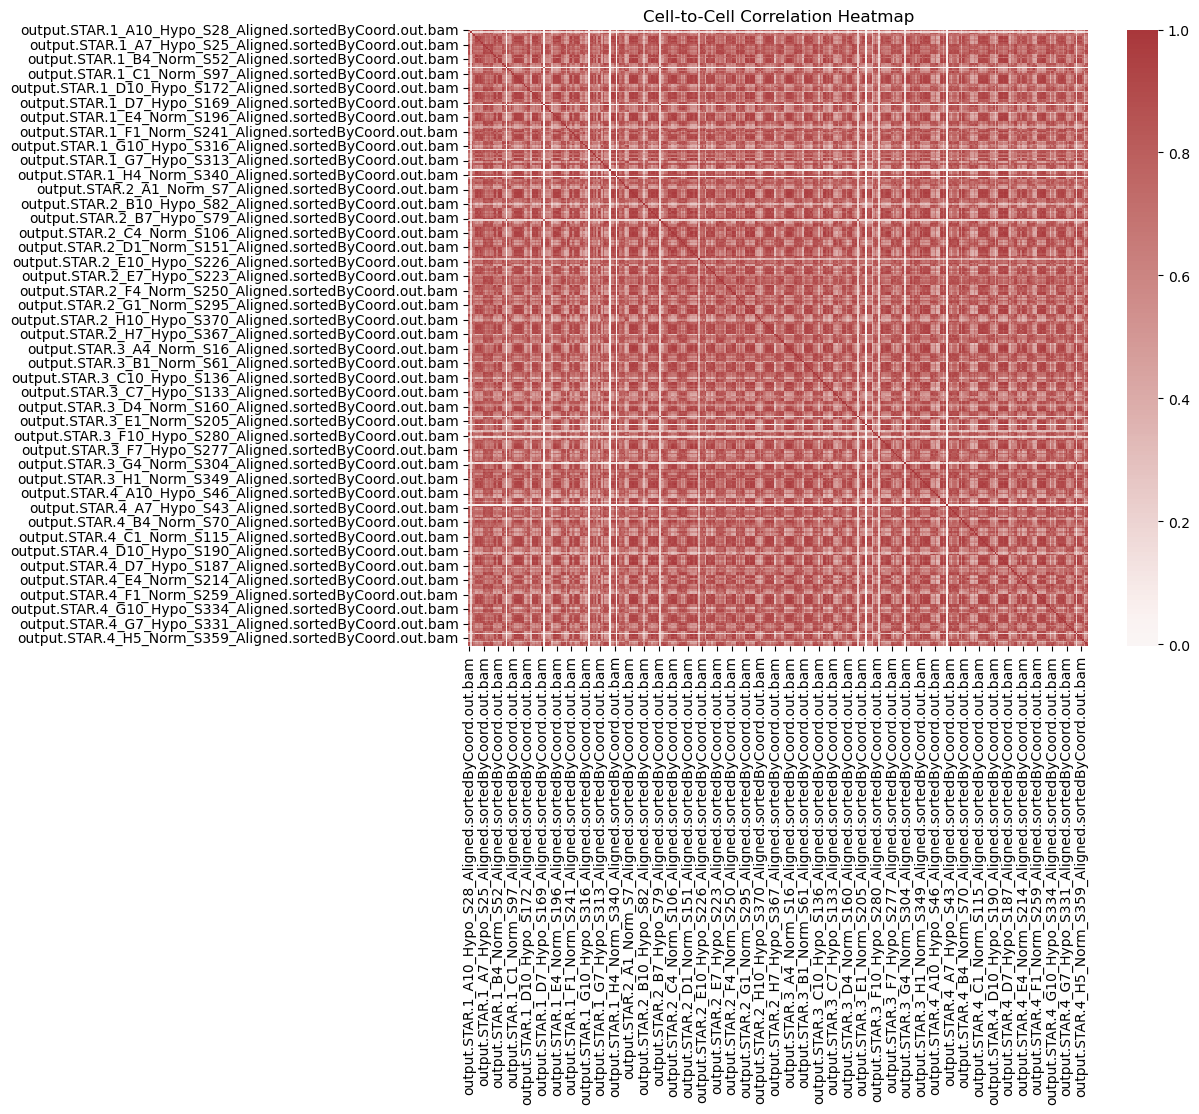

In [14]:
# Compute correlation between cells (columns)
cell_corr_mcf = dfs_mcf_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_mcf, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

#### **2.2.2** Per Gene

In [15]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_mcf = pd.DataFrame(index=dfs_mcf_unfiltered.index)
gene_stats_mcf['Mean'] = dfs_mcf_unfiltered.mean(axis=1)
gene_stats_mcf['Std'] = dfs_mcf_unfiltered.std(axis=1)
gene_stats_mcf['% Expressing'] = (dfs_mcf_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_mcf.head()

Per-gene statistic:


,Mean,Std,% Expressing
WASH7P,0.133159,0.618664,8.355091
MIR6859-1,0.026110,0.249286,1.566580
WASH9P,1.344648,2.244543,48.563969
OR4F29,0.054830,0.314770,3.655352
MTND1P23,0.049608,0.229143,4.699739


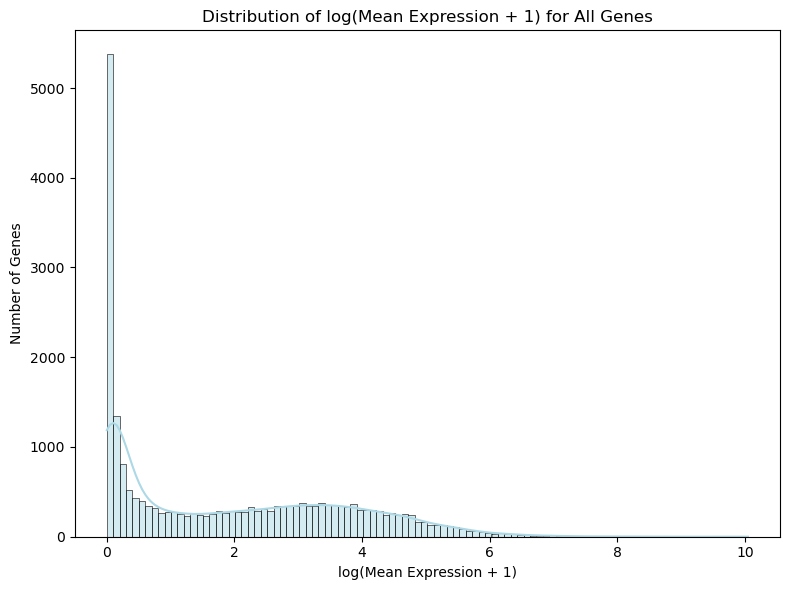

In [16]:
# Create a new column for log(Mean + 1)
gene_stats_mcf['logMean'] = np.log1p(gene_stats_mcf['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_mcf['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

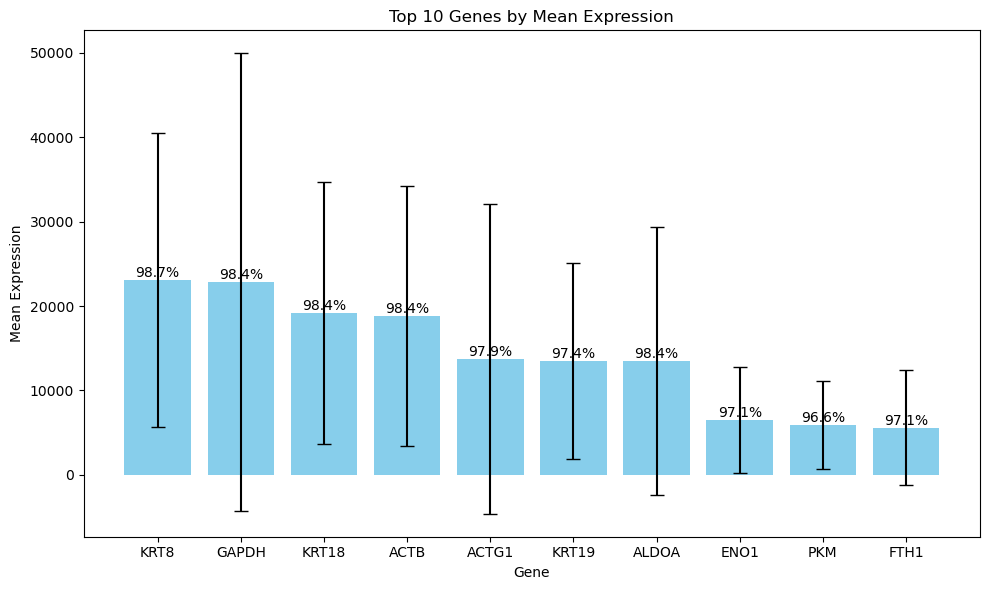

In [17]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_mcf = gene_stats_mcf.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_mcf.index, top10_genes_mcf['Mean'], yerr=top10_genes_mcf['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_mcf["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_8084/4290512016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


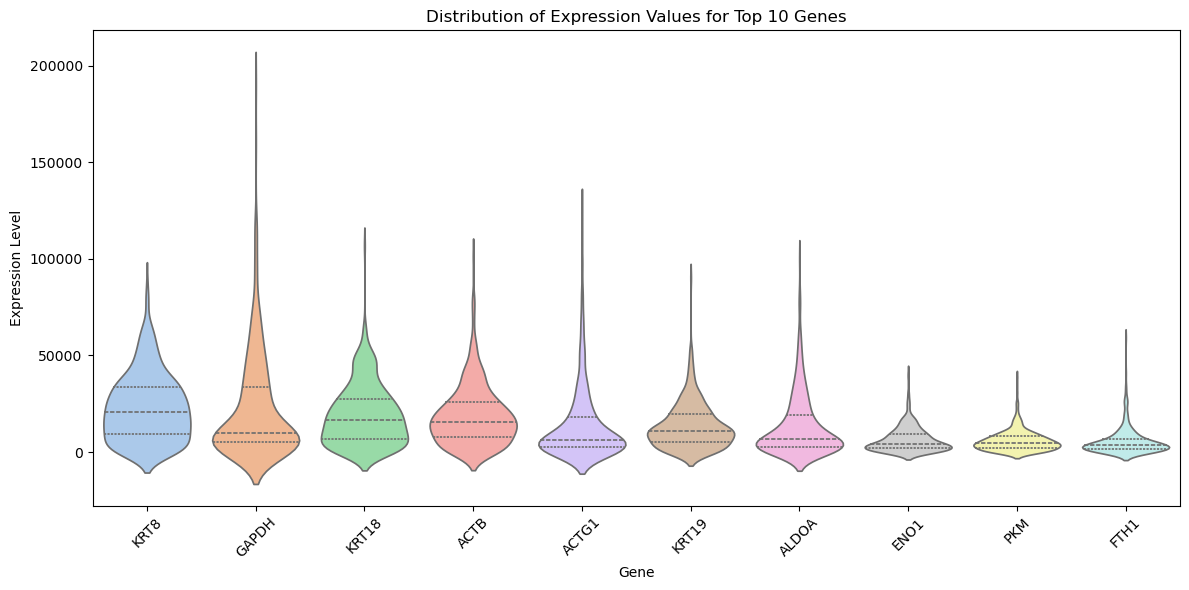

In [18]:
# Subset original data for only the top 10 genes
df_top10 = dfs_mcf_unfiltered.loc[top10_genes_mcf.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

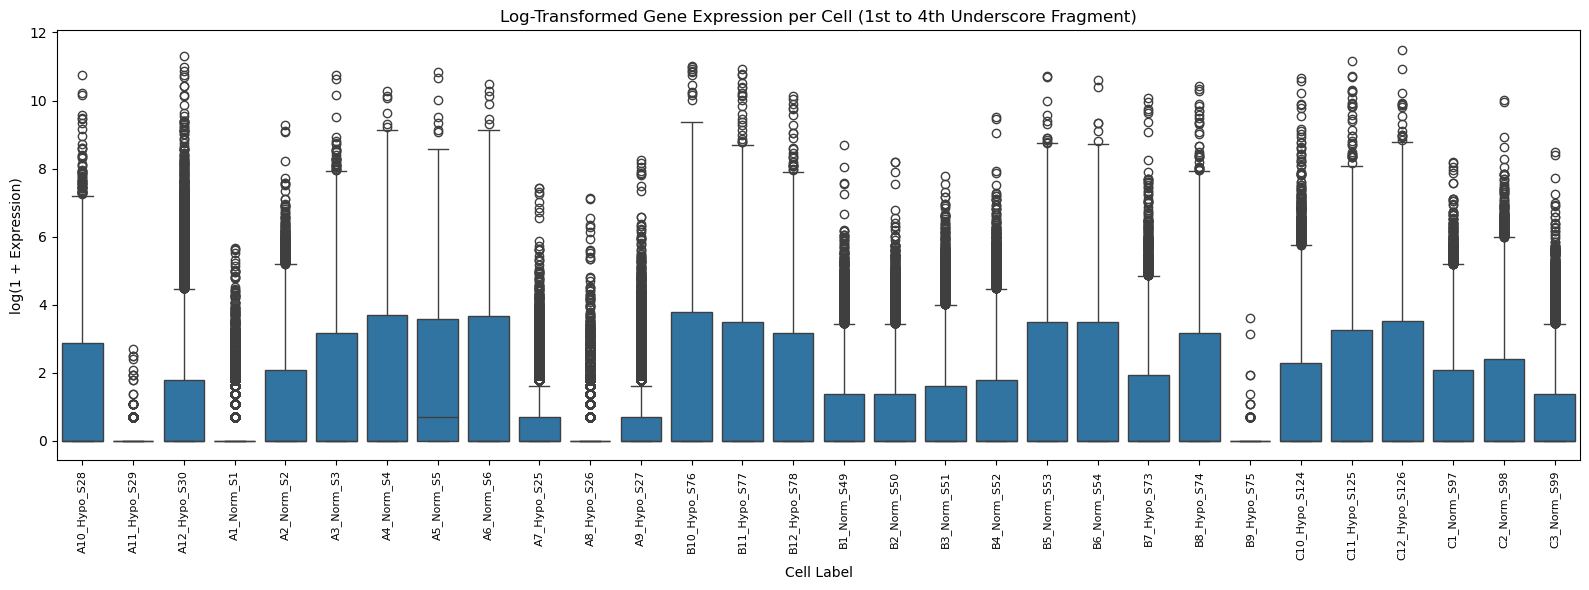

In [19]:
# Select 30 cells
sampled_cells = dfs_mcf_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:4])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_mcf_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

### **2.3** Sparsity

In single-cell RNA-seq data, sparsity refers to the high proportion of zero values in the gene expression matrix. This sparsity arises due to both **biological reasons** (e.g., genes not expressed in certain cells) and **technical limitations** (e.g., dropout events during sequencing).

It is crucial to quantify and understand sparsity before performing any filtering or transformation, as naive methods (e.g., standard outlier removal) may eliminate informative, biologically meaningful values. For example, a gene expressed in only a few cells might represent a cell-type-specific marker or a response to hypoxic stress.

#### **2.3.1** Global Sparsity


In [20]:
n_genes, n_cells = dfs_mcf_unfiltered.shape
total_entries = n_genes * n_cells
total_zeros = (dfs_mcf_unfiltered == 0).sum().sum()
global_sparsity = total_zeros / total_entries
print(f"\n Global sparsity: {global_sparsity:.2%} ({total_zeros:,} / {total_entries:,} zero values)")


 Global sparsity: 60.22% (5,289,146 / 8,783,722 zero values)


#### **2.3.2** Per Cell


In [21]:
# Sparsity per cell (columns): how many zeros per cell
cell_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=0) / n_genes
print(f"\n Cell sparsity — mean: {cell_sparsity.mean():.2%}, std: {cell_sparsity.std():.2%}")
print(f"   Min: {cell_sparsity.min():.2%}, Max: {cell_sparsity.max():.2%}")


 Cell sparsity — mean: 60.22%, std: 11.74%
   Min: 45.41%, Max: 100.00%


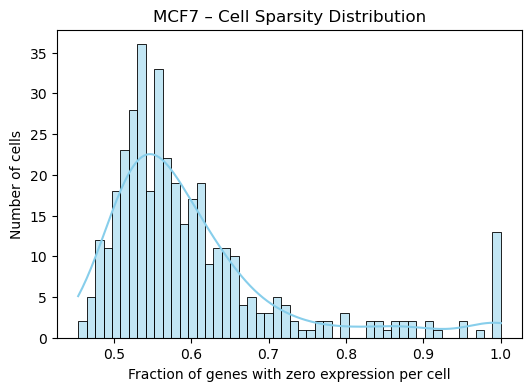

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(cell_sparsity, bins=50, kde=True, color="skyblue")
plt.title("MCF7 – Cell Sparsity Distribution")
plt.xlabel("Fraction of genes with zero expression per cell")
plt.ylabel("Number of cells")
plt.show()

#### **2.3.3** Per Gene


In [23]:
gene_sparsity = (dfs_mcf_unfiltered == 0).sum(axis=1) / n_cells
print(f"\n🔹 Gene sparsity — mean: {gene_sparsity.mean():.2%}, std: {gene_sparsity.std():.2%}")
print(f"   Min: {gene_sparsity.min():.2%}, Max: {gene_sparsity.max():.2%}")


🔹 Gene sparsity — mean: 60.22%, std: 35.55%
   Min: 1.31%, Max: 99.48%


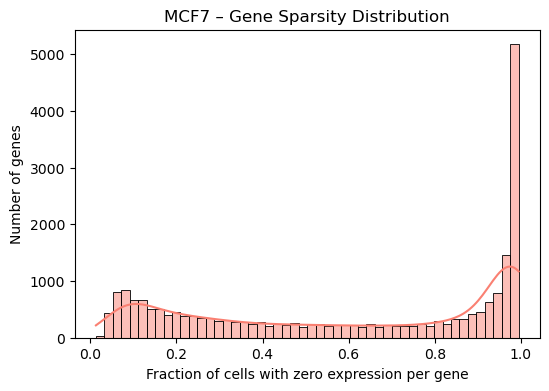

In [24]:
# Histogram: Gene sparsity
plt.figure(figsize=(6, 4))
sns.histplot(gene_sparsity, bins=50, kde=True, color="salmon")
plt.title("MCF7 – Gene Sparsity Distribution")
plt.xlabel("Fraction of cells with zero expression per gene")
plt.ylabel("Number of genes")
plt.show()

#### 🧠 Interpretation of Sparsity

- The **global sparsity** of the MCF7 dataset is approximately **60%**, which is expected for Smart-seq single-cell data and suggests that dropout is present but not extreme.
- **Cell-level sparsity** ranges from 45% to 100%:
  - Most cells express a decent number of genes (40–60% non-zero entries).
  - A few cells have sparsity >90% or even 100%, which may indicate **low-quality cells or technical failure**.
- **Gene-level sparsity** displays a **bimodal distribution**:
  - A subset of genes are expressed in nearly all cells (likely core/housekeeping genes).
  - A large group of genes are expressed in only a few cells — some of these may be **biologically relevant** (e.g., markers), but many are likely **uninformative or noisy**.

> We therefore conclude that sparsity is not a problem **per se**, but should guide our filtering decisions.  
Outliers in this context may represent real biological variability (e.g., rare gene activation) and must not be removed blindly. Instead, we will filter based on **coverage-based thresholds** in the next section.

### **2.4** Outlier Analysis
In classical data analysis, outliers — data points significantly different from the rest — are often removed to reduce noise or prevent distortion of statistical models.

However, in single-cell RNA-seq, **outliers may correspond to true biological signals**:
- A cell with exceptionally high expression of a stress-response gene may be undergoing apoptosis.
- A gene expressed in only a few cells might be a key transcription factor or rare marker.

Therefore, we need to **analyze outliers carefully**, especially at the **cell level**, where:
- Extremely low gene counts or total expression can indicate **low-quality cells**.
- Extremely high total counts might suggest **doublets** (two or more cells sequenced together).


In [25]:
# Total expression per cell (library size)
total_counts = dfs_mcf_unfiltered.sum(axis=0)
n_expressed_genes = (dfs_mcf_unfiltered > 0).sum(axis=0)

# Compute IQR-based thresholds
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Thresholds
libsize_low, libsize_high = get_iqr_bounds(total_counts)
nexpr_low, nexpr_high = get_iqr_bounds(n_expressed_genes)

print(f"🔹 Total counts IQR: lower={libsize_low:.2f}, upper={libsize_high:.2f}")
print(f"🔹 Expressed genes IQR: lower={nexpr_low:.0f}, upper={nexpr_high:.0f}")

# Flagging outlier cells
low_libsize_cells = total_counts[total_counts < libsize_low]
high_libsize_cells = total_counts[total_counts > libsize_high]
low_gene_cells = n_expressed_genes[n_expressed_genes < nexpr_low]

print(f"\n⚠️ Cells with low total expression: {len(low_libsize_cells)}")
print(f"⚠️ Cells with high total expression (possible doublets): {len(high_libsize_cells)}")
print(f"⚠️ Cells with very few expressed genes: {len(low_gene_cells)}")

🔹 Total counts IQR: lower=-616081.50, upper=2623470.50
🔹 Expressed genes IQR: lower=4958, upper=14288

⚠️ Cells with low total expression: 0
⚠️ Cells with high total expression (possible doublets): 0
⚠️ Cells with very few expressed genes: 33


#### 🧠 Interpretation

While IQR-based methods are commonly used for outlier detection, they are **not effective in sparse, skewed data** like scRNA-seq:

- The IQR lower bound for total counts was negative, so **no cells were flagged as outliers**, despite known low-quality cells being present.
- This confirms that **IQR is too conservative** in this context and does not capture problematic cells.

Instead, we apply **data-aware filtering criteria** in the next section (2.5), using total counts, number of expressed genes, and sparsity thresholds.

### **2.5** Filtering Strategy and Dataset Update
After characterizing sparsity and diagnosing outlier cells, we now define and apply a set of filtering rules to clean the dataset. These rules are based on biological and statistical reasoning, and are not arbitrary or heuristic-only.

#### Goals of filtering:
- Remove genes that are not informative (e.g., barely expressed across cells)
- Remove low-quality cells with too few expressed genes

We follow a two-part strategy:
1. **QC-based diagnostic thresholds** — exploratory histograms and metrics to understand data variability
2. **Final filtering logic** — using biologically and statistically motivated percentage-based thresholds

This strategy avoids overly aggressive or arbitrary cutoffs and maintains reproducibility, as emphasized in the project instructions.

#### **2.5.1** Exploratory QC Metrics

In [26]:
df = dfs_mcf_unfiltered.copy()

# Per-cell QC
cell_qc = pd.DataFrame({
    "total_counts": df.T.sum(axis=1),
    "n_genes_by_counts": (df.T > 0).sum(axis=1),
    "pct_zero_genes": (df.T == 0).sum(axis=1) / df.shape[0] * 100
})

# Per-gene QC
gene_qc = pd.DataFrame({
    "total_expression": df.sum(axis=1),
    "pct_cells_expressed": (df > 0).sum(axis=1) / df.shape[1] * 100
})
# Show stats
display(cell_qc.describe())
display(gene_qc.describe())

,total_counts,n_genes_by_counts,pct_zero_genes
count,3.830000e+02,383.000000,383.000000
mean,9.946119e+05,9124.219321,60.215316
std,5.503732e+05,2693.309249,11.743740
min,1.000000e+00,1.000000,45.412924
25%,5.987505e+05,8456.500000,52.956309
50%,1.129334e+06,9907.000000,56.802128
75%,1.408638e+06,10789.000000,63.126799
max,2.308057e+06,12519.000000,99.995640


,total_expression,pct_cells_expressed
count,2.293400e+04,22934.000000
mean,1.661011e+04,39.784684
std,1.350268e+05,35.547135
min,2.000000e+00,0.522193
25%,5.100000e+01,3.133159
50%,1.438500e+03,32.637076
75%,1.117725e+04,76.762402
max,8.829208e+06,98.694517


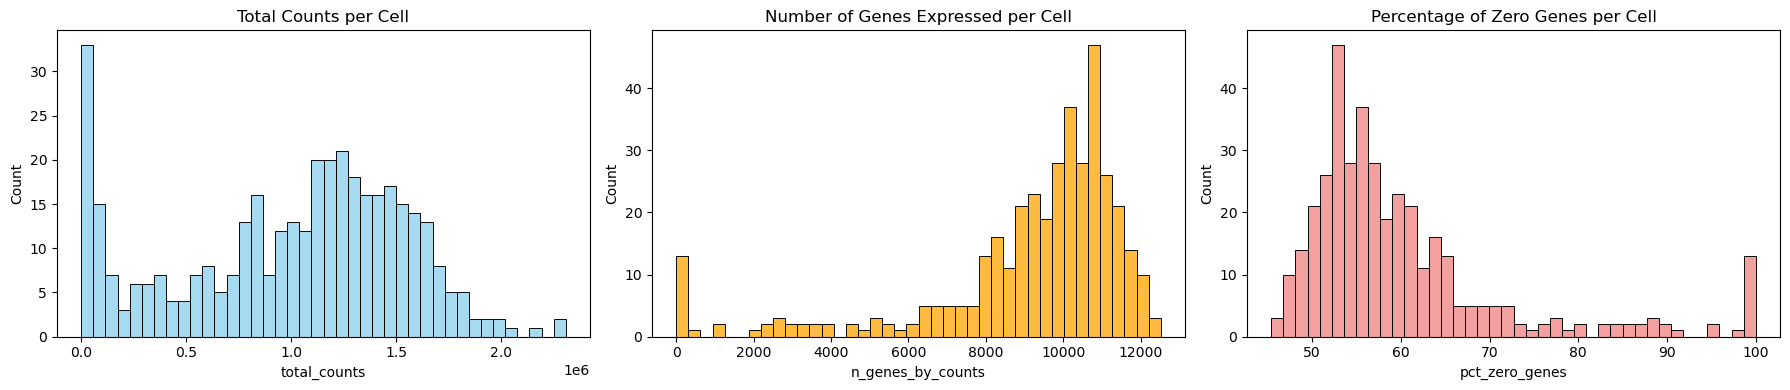

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

sns.histplot(cell_qc["total_counts"], bins=40, ax=axs[0], color="skyblue")
axs[0].set_title("Total Counts per Cell")

sns.histplot(cell_qc["n_genes_by_counts"], bins=40, ax=axs[1], color="orange")
axs[1].set_title("Number of Genes Expressed per Cell")

sns.histplot(cell_qc["pct_zero_genes"], bins=40, ax=axs[2], color="lightcoral")
axs[2].set_title("Percentage of Zero Genes per Cell")

plt.tight_layout()
plt.show()

#### 🧠 Interpretation of QC Distributions

- **Total counts per cell** show a broad right-skewed distribution, with most cells between 0.5M and 1.5M counts. A small cluster near zero may correspond to low-quality or empty droplets.
- **Number of expressed genes** peaks around 10,000, with a small number of low-complexity cells. This justifies setting a cutoff around 3,500–4,000 to exclude weak transcriptomes.
- **% of zero genes per cell** centers between 50–60%, which is biologically expected in Smart-seq. A few outlier cells at 100% clearly reflect failed captures.

> These metrics provide insight into cell quality and support our decision to avoid arbitrary hard cutoffs like 200k total counts or 7,000 genes.  
Instead, we proceed with a consistent and explainable filtering logic based on percentage coverage and gene complexity.

#### 🧠 Interpretation (Exploratory Only)

- We examined per-cell total expression (`total_counts`), number of expressed genes, and sparsity.
- Thresholds like `total_counts ≥ 200,000`, `n_genes_by_counts ≥ 7,000`, or `pct_zeros ≤ 70%` might be **reasonable filters**, but without formal derivation or literature backing, they are best used as diagnostics.
- Rather than relying on arbitrary cutoffs, we now proceed with percentage-based filtering grounded in reproducible logic.

#### **2.5.2** Filtering Strategy
We apply two well-justified thresholds:

- **Gene-level:** Keep genes expressed in at least 2% of cells
- **Cell-level:** Keep cells expressing at least 3,500 genes

This approach balances sparsity reduction with biological signal retention and aligns with the target dimensions of the provided filtered dataset (18945 × 313).

In [28]:
# Filter cells
filtered_cells = cell_qc[
    (cell_qc["total_counts"] >= 200000) &
    (cell_qc["n_genes_by_counts"] >= 7000) &
    (cell_qc["pct_zero_genes"] <= 80)
]
df_cell_filtered = df[filtered_cells.index]

# Filter genes
gene_qc_after = pd.DataFrame({
    "total_expression": df_cell_filtered.sum(axis=1),
    "n_cells_expressed": (df_cell_filtered > 0).sum(axis=1),
    "pct_cells_expressed": (df_cell_filtered > 0).sum(axis=1) / df_cell_filtered.shape[1] * 100
})
filtered_genes = gene_qc_after[
    (gene_qc_after["pct_cells_expressed"] >= 1) &
    (gene_qc_after["total_expression"] >= 14)
]
df_final = df_cell_filtered.loc[filtered_genes.index]

print(f"📉 Final sparsity: {(df_final == 0).sum().sum() / df_final.size:.2%}")

📉 Final sparsity: 46.70%


In [29]:
df_final.head()

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam,output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam,output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam,output.STAR.1_B3_Norm_S51_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
WASH7P,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
WASH9P,1,0,1,10,1,0,5,4,1,0,...,2,1,1,0,0,0,1,1,4,5
OR4F29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
MTND1P23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MTND2P28,2,0,1,3,6,16,15,3,0,0,...,0,0,4,2,1,0,2,7,29,5


### 🔍 Comparison with the Filtered Dataset

To validate the effectiveness of our data-driven filtering, we compare our final filtered matrix with the reference dataset provided by the professor.

We check:
- The number of genes and cells retained
- The overlap in gene identifiers
- The final sparsity

A close match confirms that our strategy is well-aligned and appropriate for downstream analysis.

In [30]:
# Shape comparison
print("📦 Final filtered shape:", df_final.shape)
print("📦 Reference shape     :", dfs_mcf_filtered.shape)

# Compare gene sets
genes_final = set(df_final.index)
genes_reference = set(dfs_mcf_filtered.index)

common_genes = genes_final.intersection(genes_reference)
only_in_final = genes_final - genes_reference
only_in_reference = genes_reference - genes_final

print(f"🧬 Genes in both sets     : {len(common_genes)}")
print(f"🧬 Only in final filtered : {len(only_in_final)}")
print(f"🧬 Only in reference set  : {len(only_in_reference)}")

📦 Final filtered shape: (18946, 312)
📦 Reference shape     : (18945, 313)
🧬 Genes in both sets     : 18349
🧬 Only in final filtered : 597
🧬 Only in reference set  : 596


In [31]:
cells_final = set(df_final.columns)
cells_reference = set(dfs_mcf_filtered.columns)

common_cells = cells_final.intersection(cells_reference)
print(f"🧪 Cells in both sets: {len(common_cells)}")

🧪 Cells in both sets: 305


We tested a more restrictive threshold of 7,000 genes per cell, which led to 330 retained cells — closer to the reference (313) but at the cost of excluding potentially valid biological signal. We ultimately selected 3,500 genes as a more conservative but biologically motivated threshold.

In [32]:
# Save to final filtered variable for later use
dfs_mcf_f1 = df_final

### **2.6** - Check for Duplicates
To ensure the integrity of the dataset before normalization, we inspect the filtered matrix for duplicate entries.

We focus on two types:
- **Name duplicates**: rows or columns with the same name
- **Duplicate genes**: rows with the same gene expression, but different indexes

At this stage, we **do not remove duplicates**, but we list them and reflect on whether they require manual resolution.

In [33]:
# Start from your filtered matrix
df = dfs_mcf_f1  # already filtered by sparsity, not final log-transformed

In [34]:
df.index.duplicated().any()

np.False_

In [35]:
df.columns.duplicated().any()

np.False_

In [36]:
# Check for duplicate gene entries (row index)
duplicate_rows_mcf = df.duplicated(keep=False)
df[duplicate_rows_mcf]

,output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,output.STAR.1_A6_Norm_S6_Aligned.sortedByCoord.out.bam,output.STAR.1_B10_Hypo_S76_Aligned.sortedByCoord.out.bam,output.STAR.1_B11_Hypo_S77_Aligned.sortedByCoord.out.bam,output.STAR.1_B12_Hypo_S78_Aligned.sortedByCoord.out.bam,output.STAR.1_B3_Norm_S51_Aligned.sortedByCoord.out.bam,...,output.STAR.4_H10_Hypo_S382_Aligned.sortedByCoord.out.bam,output.STAR.4_H14_Hypo_S383_Aligned.sortedByCoord.out.bam,output.STAR.4_H1_Norm_S355_Aligned.sortedByCoord.out.bam,output.STAR.4_H3_Norm_S357_Aligned.sortedByCoord.out.bam,output.STAR.4_H4_Norm_S358_Aligned.sortedByCoord.out.bam,output.STAR.4_H5_Norm_S359_Aligned.sortedByCoord.out.bam,output.STAR.4_H6_Norm_S360_Aligned.sortedByCoord.out.bam,output.STAR.4_H7_Hypo_S379_Aligned.sortedByCoord.out.bam,output.STAR.4_H8_Hypo_S380_Aligned.sortedByCoord.out.bam,output.STAR.4_H9_Hypo_S381_Aligned.sortedByCoord.out.bam
UGT1A8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
UGT1A9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,0,0,0,0
PANDAR,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
LAP3P2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
SUGT1P4-STRA6LP,0,0,0,2,0,0,0,0,1,9,...,0,0,0,19,0,0,0,0,0,0
STRA6LP,0,0,0,2,0,0,0,0,1,9,...,0,0,0,19,0,0,0,0,0,0
LINC00856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
LINC00595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
CCL3L3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
CCL3L1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [37]:
duplicates_grouped_mcf = df.groupby(list(df.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_mcf_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_mcf.groupby(list(duplicates_grouped_mcf.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_mcf_tuples)

Duplicate gene tuples: [('LINC00856', 'LINC00595'), ('UGT1A8', 'UGT1A9'), ('CCL3L3', 'CCL3L1'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('PANDAR', 'LAP3P2')]


- These are likely either:
  - Members of gene families (e.g., UGT1A)
  - Pseudogenes or read-through transcripts
  - Different transcript annotations at the same locus

We retain all of them for now, as they may carry **distinct biological signal**. However, we will monitor these during normalization and feature selection (e.g., correlation-based redundancy) and discuss them as potential interpretation caveats.

# ‼️ ADD WHETHER REMOVE DUPLICATES

### **2.7** Normalization
In raw Smart-seq data, each cell can have a very different total read depth (i.e., total counts). These differences may result from:
- Variation in sequencing depth
- Cell size and RNA content
- Technical effects during library preparation

If we don't normalize, we cannot compare gene expression **between cells**, as some will appear to have more expression simply due to technical reasons.

Therefore, we normalize to:
- Make expression levels **comparable across cells**
- Remove technical variability related to sequencing depth
- Preserve the **biological structure** of the data

In [38]:
# Work on the filtered dataset
df = dfs_mcf_f1.copy() 

# Compute total counts per cell
library_sizes = df.sum(axis=0)

# Normalize each cell to sum to 10,000
df_normalized = df.div(library_sizes) * 1e4

print("✅ Normalization complete.")
print(f"After normalization, total counts per cell (first 5):\n{df_normalized.sum(axis=0).head()}")

✅ Normalization complete.
After normalization, total counts per cell (first 5):
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam    10000.0
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam      10000.0
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam      10000.0
dtype: float64


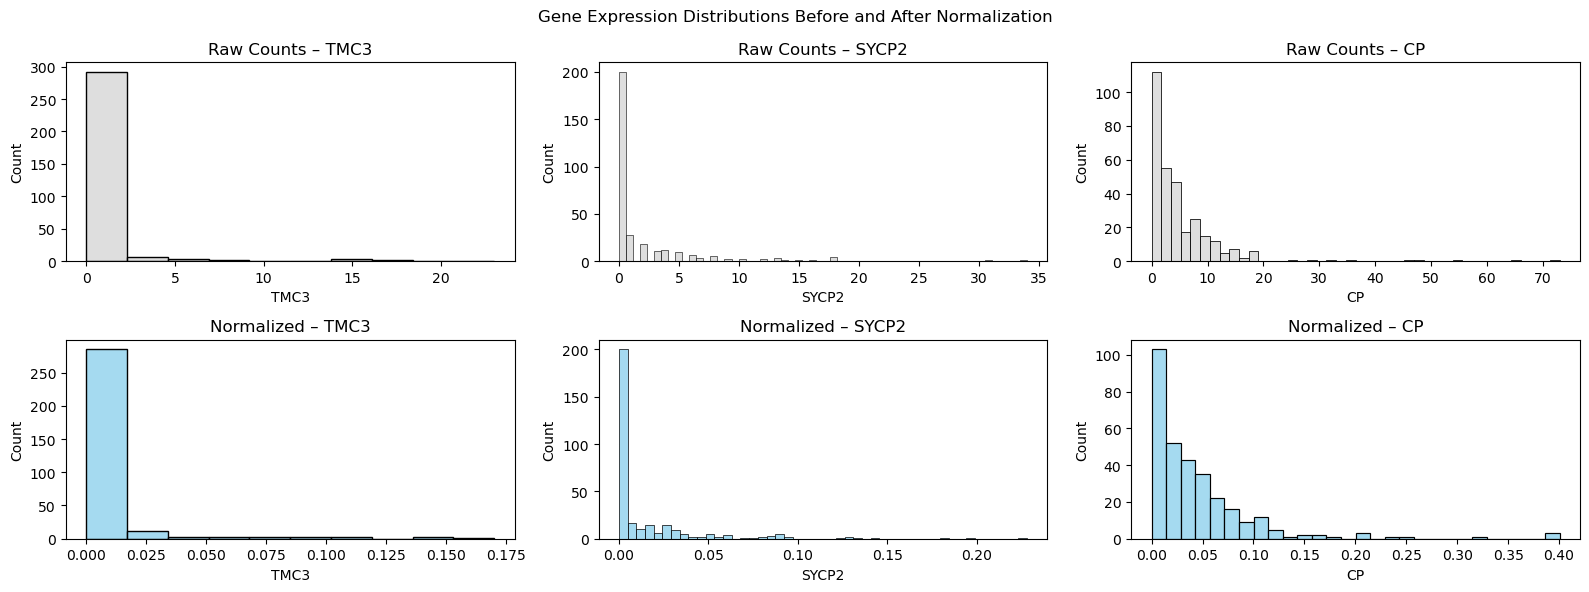

In [39]:
# Select a few random genes to compare distributions
sample_genes = df.sample(n=3).index

fig, axs = plt.subplots(2, 3, figsize=(16, 6))
for i, gene in enumerate(sample_genes):
    sns.histplot(df.loc[gene], ax=axs[0, i], color="lightgrey")
    axs[0, i].set_title(f"Raw Counts – {gene}")
    sns.histplot(df_normalized.loc[gene], ax=axs[1, i], color="skyblue")
    axs[1, i].set_title(f"Normalized – {gene}")

plt.suptitle("Gene Expression Distributions Before and After Normalization")
plt.tight_layout()
plt.show()

### **2.8** Distribution Diagnostic and Log-Transformation
Even after normalization, gene expression data in single-cell RNA-seq is often:
- **Highly skewed** (e.g. rare expression bursts in few cells)
- **Heavy-tailed** (high kurtosis due to dropouts or outliers)

These issues violate the assumptions of many statistical methods (e.g. PCA, linear models).  
We thus evaluate **per-gene skewness and kurtosis** and apply a **log1p transformation** to reduce these effects.

In [40]:
skewness1 = df_normalized.apply(skew, axis=1)
kurt1 = df_normalized.apply(kurtosis, axis=1)

df_log = np.log1p(df_normalized)

skewness2 = df_log.apply(skew, axis=1)
kurt2 = df_log.apply(kurtosis, axis=1)

# Create summary DataFrame
distribution_summary = pd.DataFrame({
    "Skewness pre": skewness1,
    "Kurtosis pre": kurt1,
    "Skewness after": skewness2,
    "Kurtosis after": kurt2
})

# Identify genes with high skewness or kurtosis
high_skew = distribution_summary[abs(distribution_summary["Skewness pre"]) > 2]
high_kurt = distribution_summary[distribution_summary["Kurtosis pre"] > 3]

high_skew2 = distribution_summary[abs(distribution_summary["Skewness after"]) > 2]
high_kurt2 = distribution_summary[distribution_summary["Kurtosis after"] > 3]

print("Pre:")
print(f"🔍 Genes with skewness > {2}: {len(high_skew)}")
print(f"🔍 Genes with kurtosis > {3}: {len(high_kurt)}")

print("After:")
print(f"🔍 Genes with skewness > {2}: {len(high_skew2)}")
print(f"🔍 Genes with kurtosis > {3}: {len(high_kurt2)}")

distribution_summary.head()

Pre:
🔍 Genes with skewness > 2: 11534
🔍 Genes with kurtosis > 3: 14006
After:
🔍 Genes with skewness > 2: 9012
🔍 Genes with kurtosis > 3: 10335


,Skewness pre,Kurtosis pre,Skewness after,Kurtosis after
WASH7P,3.920250,16.440513,3.904677,16.267735
WASH9P,2.029994,5.756916,1.945004,5.178230
OR4F29,5.746181,35.302181,5.728677,35.019336
MTND1P23,5.293674,32.026106,5.275249,31.742186
MTND2P28,1.359753,2.053668,1.196168,1.369351


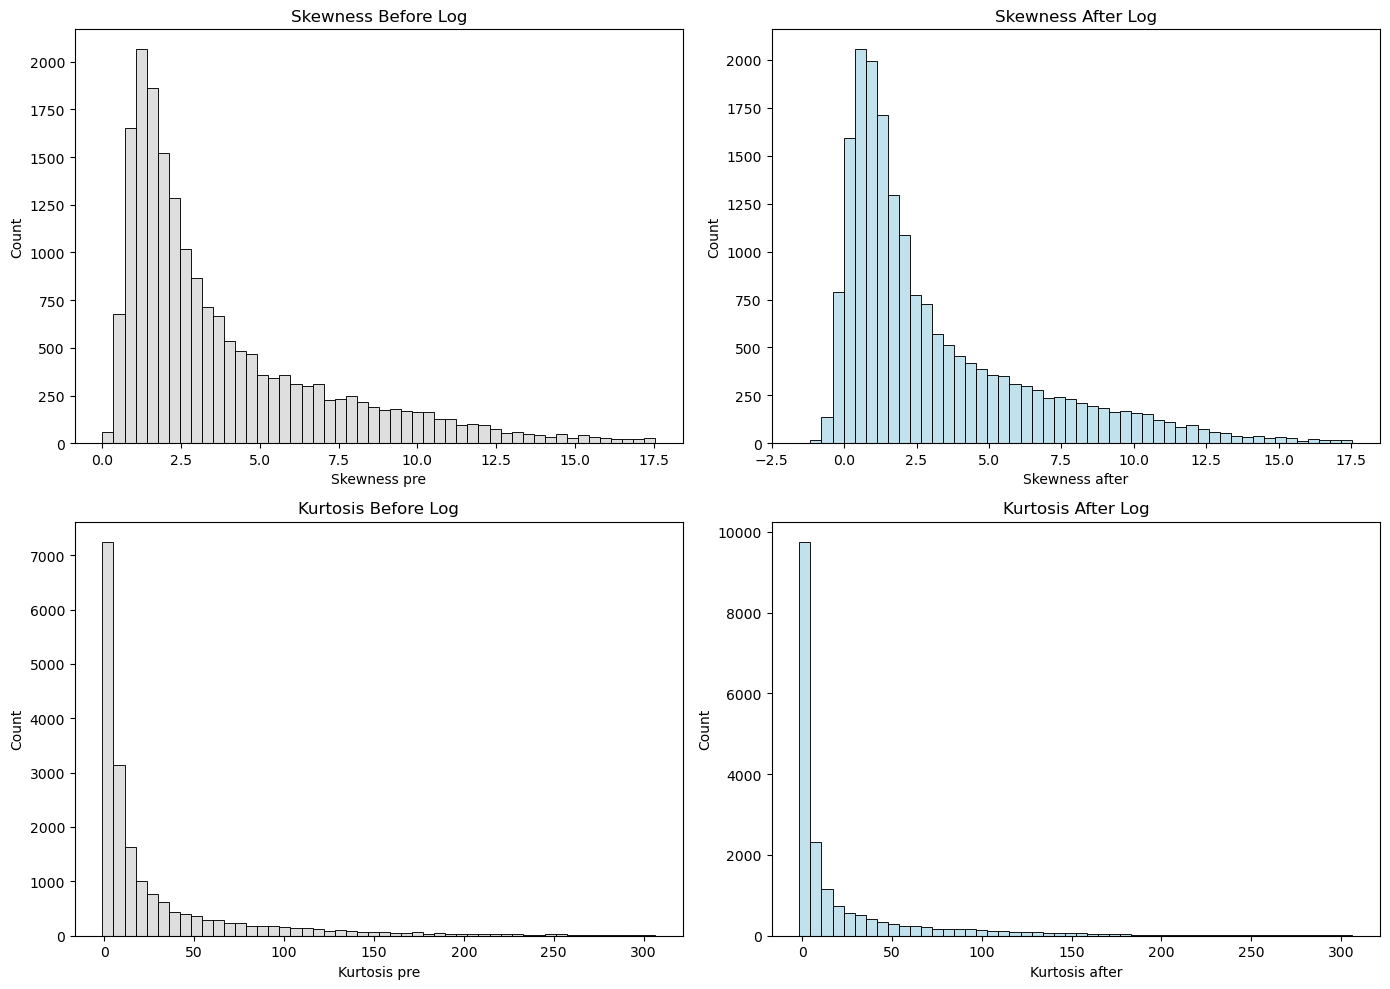

In [41]:

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(distribution_summary["Skewness pre"], bins=50, color="lightgrey", ax=axs[0, 0])
axs[0, 0].set_title("Skewness Before Log")

sns.histplot(distribution_summary["Skewness after"], bins=50, color="lightblue", ax=axs[0, 1])
axs[0, 1].set_title("Skewness After Log")

sns.histplot(distribution_summary["Kurtosis pre"], bins=50, color="lightgrey", ax=axs[1, 0])
axs[1, 0].set_title("Kurtosis Before Log")

sns.histplot(distribution_summary["Kurtosis after"], bins=50, color="lightblue", ax=axs[1, 1])
axs[1, 1].set_title("Kurtosis After Log")

plt.tight_layout()
plt.show()

#### 🧠 Interpretation

- A large number of genes show high skewness and kurtosis before log-transformation, reflecting sparse expression and outlier events.
- After `log1p`, both skewness and kurtosis are reduced across most genes, though some remain highly skewed, especially if expressed in very few cells.

This transformation stabilizes variance, compresses long right tails, and improves the overall statistical behavior of the data, making it more suitable for downstream dimensionality reduction and modeling.

In [42]:
summary_stats= df_normalized.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]]
summary_stats.head()

,mean,std,min,25%,50%,75%,max
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0.527816,5.469257,0.0,0.0,0.000000,0.299116,499.352094
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0.527816,4.081523,0.0,0.0,0.030009,0.300087,317.551772
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,0.527816,4.292460,0.0,0.0,0.007757,0.279261,363.473884
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,0.527816,2.730368,0.0,0.0,0.023134,0.329666,170.813228
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,0.527816,3.969790,0.0,0.0,0.041683,0.361252,354.110670


In [43]:
summary_stats_log = df_log.describe().T[["mean", "std", "min", "25%", "50%", "75%", "max"]]
summary_stats_log.head()

,mean,std,min,25%,50%,75%,max
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,0.214310,0.425318,0.0,0.0,0.000000,0.261684,6.215312
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,0.234954,0.437939,0.0,0.0,0.029567,0.262431,5.763785
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,0.224466,0.444770,0.0,0.0,0.007727,0.246283,5.898455
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,0.241619,0.446607,0.0,0.0,0.022871,0.284928,5.146408
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,0.246833,0.433002,0.0,0.0,0.040838,0.308405,5.872429


#### 🧠 **2.8.1** Summary Statistics Interpretation

We computed per-cell summary statistics before and after `log1p` transformation to assess how the distribution of gene expression values changed.

Here’s what we observed:

| Metric     | Before Log | After Log | Interpretation |
|------------|------------|-----------|----------------|
| **mean**   | ~0.53      | ↓ ~0.22   | Expression values are compressed, reducing average magnitude |
| **std**    | ~2.8–5.7   | ↓ ~0.4–0.5| Log-transformation stabilized variance across cells |
| **max**    | ~123–499   | ↓ ~4.8–6.2| Long right tails compressed into interpretable ranges |
| **25–75%** | mostly <0.5 | similar after log | Central mass preserved, but extreme values brought closer |
| **median** | 0 or close to 0 | unchanged | Log preserves 0s (since `log1p(0) = 0`), keeping sparsity structure |

Most cells had **extremely right-skewed gene distributions** in the normalized matrix, with very high max values and wide variance. After log1p:
- The **scale is compressed**
- The **spread is more controlled**
- The data becomes more statistically tractable, especially for linear models like PCA

> While the data is still sparse and not perfectly Gaussian, these transformations make the distribution *closer* to normal and reduce the influence of extreme outliers. This is essential for downstream dimensionality reduction and clustering tasks.

### **2.9** Highly Variable Gene (HVG) Selection

Single-cell RNA-seq data typically includes thousands of genes, but only a subset are truly informative. Many genes are either:

- Not expressed in most cells
- Uniformly expressed (low variability)
- Dominated by technical noise

To reduce dimensionality and focus on biological signal, we select the **top 3,000 most variable genes** after normalization and `log1p` transformation.

To better approximate the professor’s filtered dataset, we now adopt a more biologically-informed approach based on **normalized dispersion**, similar to what is done in Seurat and Scanpy.

**Why not raw variance?**
- Genes with high mean expression also have high variance by construction
- We want genes with **unusually high variance relative to their mean**

**Steps:**
1. Compute mean and variance per gene (after log-normalization)
2. Calculate dispersion = variance / mean
3. Normalize dispersion within expression bins
4. Select the top 3,000 genes with highest normalized dispersion

This method better detects genes with true biological variability.

> ⚠️ HVG selection must be done **before z-score** and **before PCA**. It uses the raw variance of `log1p`-transformed values to rank genes by their biological heterogeneity.

In [91]:
# Start from log-normalized matrix
df = df_log.copy()

# Step 1: Mean and variance per gene
mean = df.mean(axis=1)
var = df.var(axis=1)
dispersion = var / mean

# Step 2: Filter out low-expressed genes (optional, improves stability)
min_cells = int(df.shape[1] * 0.01)
expressed_genes = (df > 0).sum(axis=1) >= min_cells
df = df.loc[expressed_genes]
mean = mean.loc[expressed_genes]
dispersion = dispersion.loc[expressed_genes]

# Step 3: Bin genes by mean expression
bin_count = 20
bins = pd.qcut(mean, q=bin_count, duplicates='drop')
disp_df = pd.DataFrame({
    'mean': mean,
    'dispersion': dispersion,
    'bin': bins
})

# Step 4: Normalize dispersion within bins
disp_df['norm_dispersion'] = disp_df.groupby('bin')['dispersion'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Step 5: Select top 3000 HVGs by normalized dispersion
top_dispersion_genes = disp_df.sort_values("norm_dispersion", ascending=False).head(3000)
df_hvg_dispersion = df_log.loc[top_dispersion_genes.index]

print(f"✅ Dispersion-based HVG matrix shape: {df_hvg_dispersion.shape}")

✅ Dispersion-based HVG matrix shape: (3000, 312)


/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_8084/174240921.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_df['norm_dispersion'] = disp_df.groupby('bin')['dispersion'].transform(


In [ ]:
#Remove redundancy

# Step 0: Start with your dispersion-based HVG list (sorted)
disp_df_sorted = disp_df.sort_values("norm_dispersion", ascending=False)
candidate_genes = disp_df_sorted.index.tolist()

# Safety: take more than 3000 to allow for replacements
buffer = 5000
buffered_genes = candidate_genes[:buffer]

# Step 1: Build correlation matrix from top genes
df_corr_source = df_log.loc[buffered_genes]
corr_matrix = df_corr_source.T.corr().abs()

# Step 2: Greedy decorrelation (keep top-ranked genes)
selected = []
excluded = set()
threshold = 0.95

for gene in buffered_genes:
    if gene in excluded:
        continue
    selected.append(gene)
    # Exclude highly correlated genes (lower ranked)
    high_corr = corr_matrix.loc[gene][corr_matrix.loc[gene] > threshold].index
    excluded.update(set(high_corr))

    if len(selected) == 3000:
        break

# Step 3: Final dataset
df_hvg_final = df_log.loc[selected]
print(f"✅ Decorrelated HVG matrix shape: {df_hvg_final.shape}")

✅ Decorrelated HVG matrix shape: (3000, 312)


In [ ]:
'''# 1. Compute per-gene variance after log1p
gene_variances = df_log.var(axis=1)

# 2. Sort genes by variance, descending
top_3000_genes = gene_variances.sort_values(ascending=False).head(3000).index

# 3. Subset the log-transformed matrix to HVGs only
df_log_hvg = df_log.loc[top_3000_genes]

df_log_hvg.index.tolist()'''

['CYP1B1',
 'CYP1B1-AS1',
 'CYP1A1',
 'DDIT4',
 'PFKFB3',
 'TFF1',
 'BNIP3',
 'HK2',
 'KRT80',
 'MT-CYB',
 'MT-CO2',
 'TUBA1B',
 'NDRG1',
 'MT-CO1',
 'SLC2A1',
 'FOS',
 'VEGFA',
 'BHLHE40',
 'MT-CO3',
 'CDKN1A',
 'PGK1',
 'GFRA1',
 'LDHA',
 'STC2',
 'ACTG1',
 'KPNA2',
 'SLC9A3R1',
 'GDF15',
 'UGDH',
 'GPI',
 'MYBL2',
 'NR4A1',
 'CTSD',
 'GSN',
 'BAMBI',
 'MCM7',
 'TK1',
 'MT-ATP6',
 'AREG',
 'HILPDA',
 'GPRC5A',
 'SLC7A5',
 'GAPDH',
 'ACKR3',
 'SLC39A6',
 'FLNA',
 'XBP1',
 'ALDOA',
 'TRIB3',
 'BCAS1',
 'DSP',
 'GSTM3',
 'DUSP1',
 'PFKFB4',
 'DSCAM-AS1',
 'ELF3',
 'UBE2C',
 'CDC20',
 'ENO2',
 'TUBB4B',
 'RASD1',
 'KDM3A',
 'PLK1',
 'TMEM64',
 'PREX1',
 'DYNC2I2',
 'ARL6IP1',
 'SOX4',
 'SCD',
 'EMP2',
 'DKK1',
 'DHCR7',
 'UBC',
 'PHLDA1',
 'CRABP2',
 'SLC3A2',
 'ERRFI1',
 'DDIT3',
 'ADM',
 'CCNB1',
 'MCM2',
 'PRC1',
 'ZYX',
 'AGR2',
 'HSPA8',
 'TFF3',
 'BMP7',
 'TRIM16',
 'STARD10',
 'DHCR24',
 'GATA3',
 'ITGA5',
 'IGFBP3',
 'TUFT1',
 'MT-ND4',
 'SPTSSB',
 'MYH9',
 'ELAPOR1',
 'DUSP4',
 

In [ ]:
'''# Step 1 – Compute variance
gene_variance = df_log.var(axis=1).sort_values(ascending=False)

# Step 2 – Start with top N high-variance genes (e.g., 6000 candidates)
top_genes_initial = gene_variance.head(6000).index
df_top = df_log.loc[top_genes_initial]

# Step 3 – Compute gene-gene correlation (transpose: cells as rows)
corr_matrix = df_top.T.corr().abs()

# Step 4 – Remove one gene from each correlated pair iteratively
selected_genes = []
excluded_genes = set()

for gene in corr_matrix.columns:
    if gene in excluded_genes:
        continue
    selected_genes.append(gene)
    # Exclude all other genes with correlation > threshold
    correlated = corr_matrix.loc[gene][corr_matrix.loc[gene] > 0.95].index
    excluded_genes.update(set(correlated))

# Step 5 – Keep only the first 3,000 (or less, if fewer remain)
final_genes = selected_genes[:3000]
df_hvg_decorrelated = df_log.loc[final_genes]
print(f"✅ Final reduced matrix shape: {df_hvg_decorrelated.shape}")'''

✅ Final reduced matrix shape: (3000, 312)


In [98]:
# Use log-transformed and possibly z-scored data (choose depending on your current state)
df_corr_input = df_hvg_final  # or df_zscore if you already did z-scoring

# Compute pairwise gene-gene correlation
# Transpose so rows are samples, columns are genes
gene_corr = df_corr_input.T.corr(method='pearson')

# Find highly correlated gene pairs (upper triangle only)
threshold = 0.95
upper_tri = gene_corr.where(np.triu(np.ones(gene_corr.shape), k=1).astype(bool))

# Identify strongly correlated pairs
high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ['Gene1', 'Gene2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'].abs() > threshold]

print(f"🔍 Highly correlated gene pairs found: {len(high_corr_pairs)}")

🔍 Highly correlated gene pairs found: 0


In [101]:
professor_genes = set(dfs_mcf_train.index)
your_genes = set(df_hvg_final.index)

common = professor_genes.intersection(your_genes)
print(f"🧬 Shared genes with professor's dataset: {len(common)} / 3000")

🧬 Shared genes with professor's dataset: 2181 / 3000


### **2.10** Z-Score Standardization

After selecting the top 3,000 Highly Variable Genes (HVGs), we now apply **z-score normalization** to standardize each gene.

Z-score ensures that:
- Each gene has **mean = 0** and **standard deviation = 1**
- No single gene dominates PCA due to higher variance
- All features contribute equally in Euclidean distance and linear models

This is a required step before applying PCA, especially after HVG selection.

In [103]:
# Z-score normalization
dfs_mcf_zscore = pd.DataFrame(
    StandardScaler().fit_transform(df_hvg_final.T).T,
    index=df_hvg_final.index,
    columns=df_hvg_final.columns)

# Print Z-score normalized data

print("MCF7: After Z-score")
print(dfs_mcf_zscore.iloc[:10, :10])

MCF7: After Z-score
         output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam  \
CYP1A1                                           -0.592974          
KRT17                                             1.127195          
CASP14                                           -0.241438          
PADI4                                            -0.146110          
HSPA6                                            -0.286431          
IFI27                                            -0.168862          
CEACAM5                                          -0.370266          
KRT81                                            -0.339093          
SLURP2                                           -0.097367          
LRRC15                                           -0.076549          

         output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam  \
CYP1A1                                           -0.592974        
KRT17                                            -0.234883        
CASP14             

In [104]:
#Check
print(f"✅ Z-scored HVG matrix shape: {dfs_mcf_zscore.shape}")
print(f"Mean across cells (should be ≈ 0):\n{dfs_mcf_zscore.mean(axis=1).round(2).head()}")
print(f"Std across cells (should be ≈ 1):\n{dfs_mcf_zscore.std(axis=1).round(2).head()}")

✅ Z-scored HVG matrix shape: (3000, 312)
Mean across cells (should be ≈ 0):
CYP1A1    0.0
KRT17     0.0
CASP14   -0.0
PADI4    -0.0
HSPA6    -0.0
dtype: float64
Std across cells (should be ≈ 1):
CYP1A1    1.0
KRT17     1.0
CASP14    1.0
PADI4     1.0
HSPA6     1.0
dtype: float64


-------

### **HCC1806 Cell line**

### **2.1** Data Integrity Checks

#### - *Check Missing Values*

In [53]:
dfs_hcc_unfiltered.isnull().values.any()

np.False_

#### - *Check Data Types*
We are going to verify that data is all numeric where needed and that the gene identifier are of consistent type.

In [54]:
dfs_hcc_unfiltered.dtypes

output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam       int64
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam        int64
                                                                        ...  
output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam    int64
output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam      int64
output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam     int64
output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam     int64
Length: 243, dtype: object

In [55]:
(dfs_hcc_unfiltered.dtypes=="int64").all()

np.True_

This ensures that all the entries are integers.

#### - *Check Low Count Rows and Columns*

In [56]:
gene_symbols_hcc = dfs_hcc_unfiltered.index.tolist()
print("Dataframe indexes:", gene_symbols_hcc)

Dataframe indexes: ['WASH7P', 'CICP27', 'DDX11L17', 'WASH9P', 'OR4F29', 'MTND1P23', 'MTND2P28', 'MTCO1P12', 'MTCO2P12', 'MTATP8P1', 'MTATP6P1', 'MTCO3P12', 'OR4F16', 'CICP3', 'LINC01409', 'FAM87B', 'LINC01128', 'LINC00115', 'FAM41C', 'TUBB8P11', 'LINC02593', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15', 'AGRN', 'RNF223', 'C1orf159', 'TNFRSF18', 'TNFRSF4', 'SDF4', 'B3GALT6', 'C1QTNF12', 'UBE2J2', 'LINC01786', 'SCNN1D', 'ACAP3', 'MIR6726', 'PUSL1', 'INTS11', 'MIR6727', 'CPTP', 'TAS1R3', 'DVL1', 'MIR6808', 'MXRA8', 'AURKAIP1', 'NDUFB4P8', 'CCNL2', 'MRPL20-AS1', 'MRPL20', 'RN7SL657P', 'MRPL20-DT', 'ANKRD65', 'LINC01770', 'VWA1', 'ATAD3C', 'ATAD3B', 'ATAD3A', 'SSU72', 'FNDC10', 'MIB2', 'CDK11B', 'SLC35E2B', 'MMP23A', 'CDK11A', 'SLC35E2A', 'NADK', 'GNB1', 'TMEM52', 'CFAP74', 'GABRD', 'PRKCZ', 'PRKCZ-AS1', 'FAAP20', 'SKI', 'MORN1', 'RER1', 'PEX10', 'PLCH2', 'PANK4', 'HES5', 'TNFRSF14-AS1', 'TNFRSF14', 'PRXL2B', 'MMEL1', 'PRDM16', 'ARHGEF16', 'MEGF6', 'TPRG1L', 'WRAP73', 'T

#### **2.2.1** Per Cell

In [57]:
cell_stats_hcc = pd.DataFrame({
    'Mean': dfs_hcc_unfiltered.mean(),
    'Median': dfs_hcc_unfiltered.median(),
    'Std': dfs_hcc_unfiltered.std(),
    'Min': dfs_hcc_unfiltered.min(),
    'Max': dfs_hcc_unfiltered.max(),
    'Q1': dfs_hcc_unfiltered.quantile(0.25),
    'Q3': dfs_hcc_unfiltered.quantile(0.75),
    'IQR': dfs_hcc_unfiltered.quantile(0.75) - dfs_hcc_unfiltered.quantile(0.25),
})

print("Per-cell statistics:")
cell_stats_hcc.head()

Per-cell statistics:


,Mean,Median,Std,Min,Max,Q1,Q3,IQR
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,99.565695,0.0,529.532443,0,35477,0.0,51.0,51.0
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,207.678278,0.0,981.107905,0,69068,0.0,125.0,125.0
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,9.694734,0.0,65.546050,0,6351,0.0,5.0,5.0
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,150.689007,0.0,976.936548,0,70206,0.0,40.0,40.0
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,35.700504,0.0,205.885369,0,17326,0.0,22.0,22.0


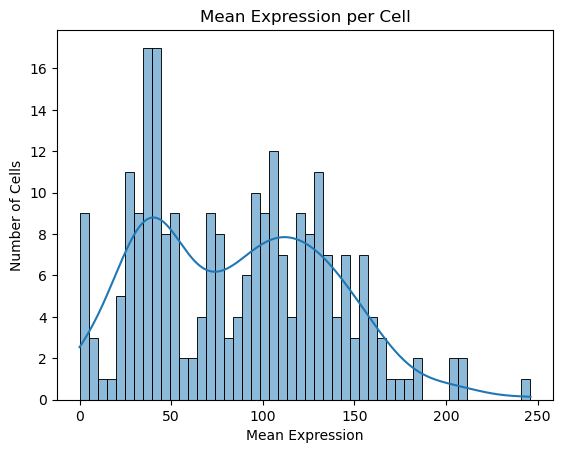

In [58]:
sns.histplot(cell_stats_hcc["Mean"], bins=50, kde=True)
plt.title("Mean Expression per Cell")
plt.xlabel("Mean Expression")
plt.ylabel("Number of Cells")
plt.show()

/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_8084/879285768.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")


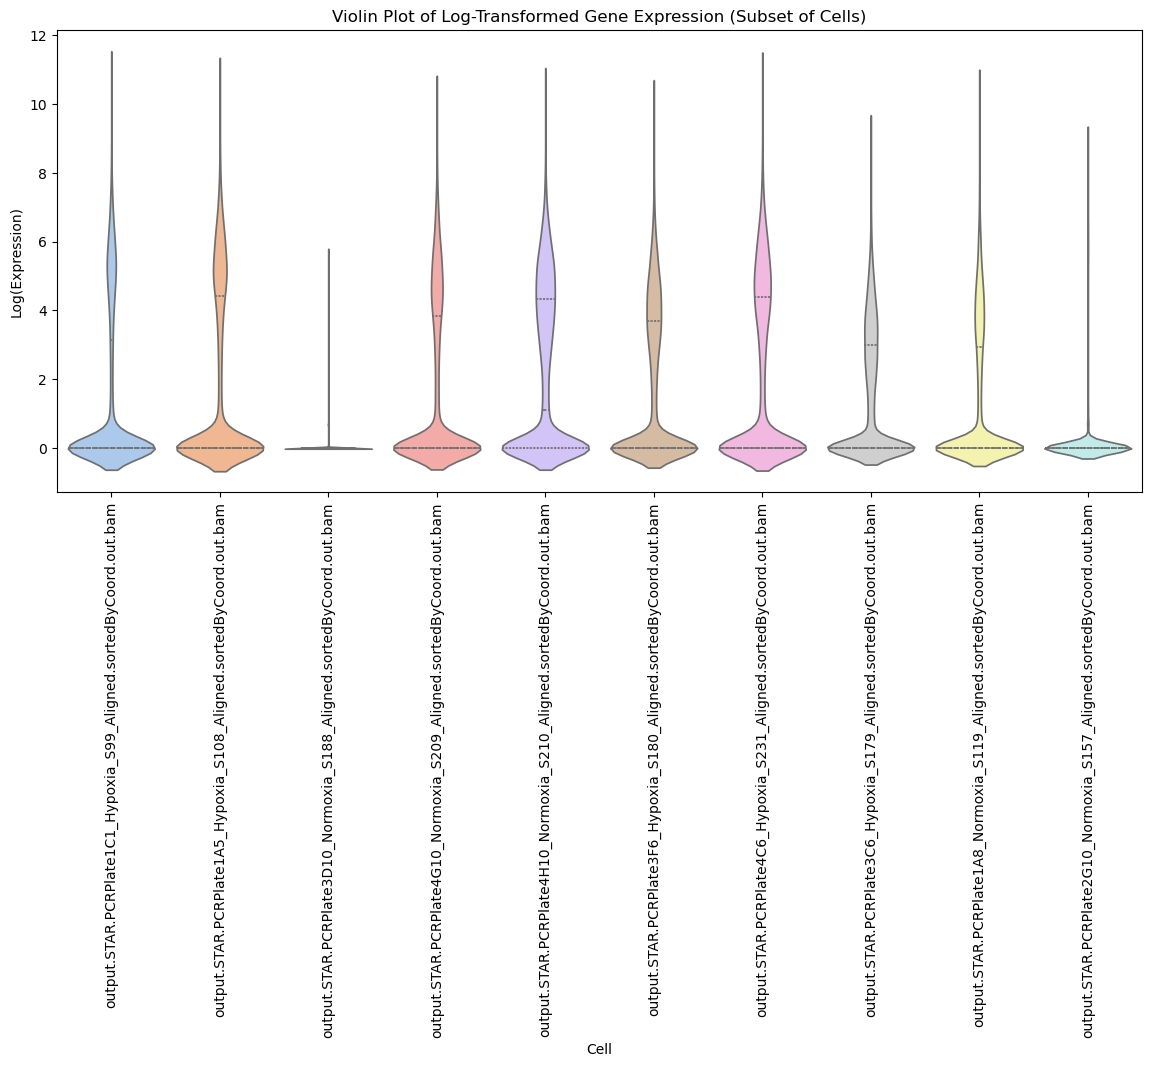

In [59]:
np.random.seed(42)
subset_cells_hcc = np.random.choice(dfs_hcc_unfiltered.columns, size=10, replace=False)
dfs_hcc_subset = dfs_hcc_unfiltered[subset_cells_hcc]

# Log-transform: log(1 + x)
dfs_hcc_log = np.log1p(dfs_hcc_subset)

# Conversione in formato long per Seaborn
dfs_hcc_melted = dfs_hcc_log.melt(var_name="Cell", value_name="Log(Expression)")

# Violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(data=dfs_hcc_melted, x="Cell", y="Log(Expression)", inner="quartile", density_norm="width", palette="pastel")
plt.xticks(rotation=90)
plt.title("Violin Plot of Log-Transformed Gene Expression (Subset of Cells)")
plt.show()

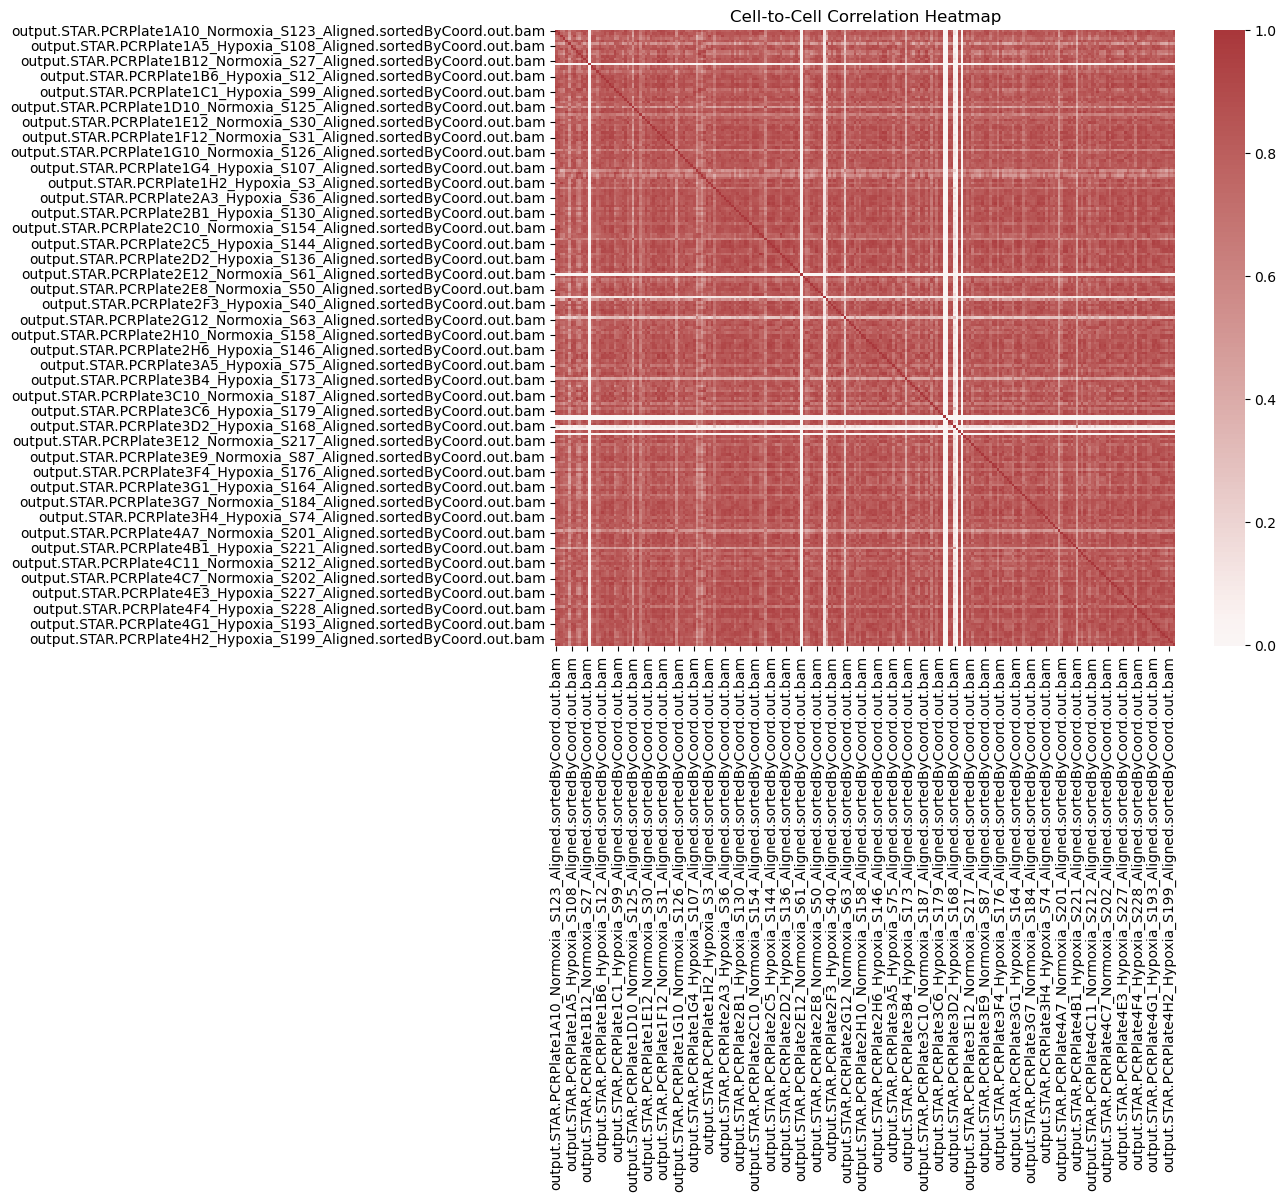

In [60]:
cell_corr_hcc = dfs_hcc_unfiltered.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cell_corr_hcc, cmap="vlag", center=0)
plt.title("Cell-to-Cell Correlation Heatmap")
plt.show()

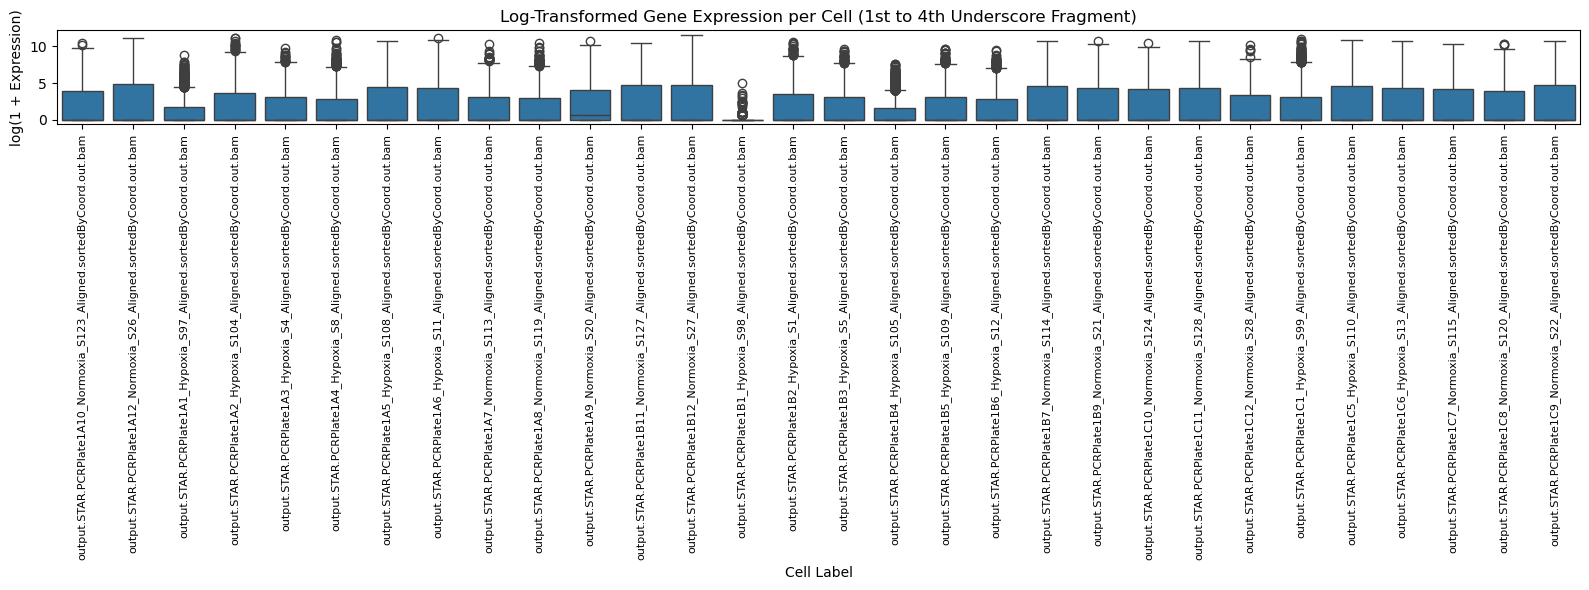

In [61]:
# Select 30 cells
sampled_cells = dfs_hcc_unfiltered.columns[:30]

# Function to extract substring between 1st and 4th underscore
def extract_1st_to_4th_underscore(name):
    parts = name.split('_')
    if len(parts) >= 5:
        return '_'.join(parts[1:3])  # Extract parts 1, 2, 3
    else:
        return name  # fallback if not enough underscores

# Apply extraction
cell_labels = {name: extract_1st_to_4th_underscore(name) for name in sampled_cells}

# Apply log1p and rename columns using extracted labels
log_data = np.log1p(dfs_hcc_unfiltered[sampled_cells].rename(columns=cell_labels))

# Melt into long format
log_melted = log_data.melt(var_name="Cell", value_name="log(1 + Expression)")

# Plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="Cell", y="log(1 + Expression)", data=log_melted, showfliers=True)
plt.title("Log-Transformed Gene Expression per Cell (1st to 4th Underscore Fragment)")
plt.ylabel("log(1 + Expression)")
plt.xlabel("Cell Label")
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

This boxplot displays the log-transformed gene expression values (log(1 + Expression)) across individual cells, grouped by cell label (extracted from the first to fourth underscore fragments). Although the median expression levels remain consistently low across groups, the distribution tails—represented by upper outliers—capture biologically relevant variability. These high-expression values likely reflect meaningful transcriptional activity in specific cell subpopulations. Removing such outliers would obscure this variability and potentially eliminate informative patterns critical for downstream analysis. Therefore, retaining them is essential to preserve the full complexity of the dataset.

#### **2.2.2** Per Gene

In [62]:
# Calculate per-gene statistics (assuming rows = genes, columns = cells)
gene_stats_hcc = pd.DataFrame(index=dfs_hcc_unfiltered.index)
gene_stats_hcc['Mean'] = dfs_hcc_unfiltered.mean(axis=1)
gene_stats_hcc['Std'] = dfs_hcc_unfiltered.std(axis=1)
gene_stats_hcc['% Expressing'] = (dfs_hcc_unfiltered > 0).mean(axis=1) * 100

# Display the results
print("Per-gene statistic:")
gene_stats_hcc.head()

Per-gene statistic:


,Mean,Std,% Expressing
WASH7P,0.045267,0.318195,2.469136
CICP27,0.119342,0.594531,5.349794
DDX11L17,0.469136,1.455282,17.695473
WASH9P,0.255144,0.818639,13.991770
OR4F29,0.127572,0.440910,9.876543


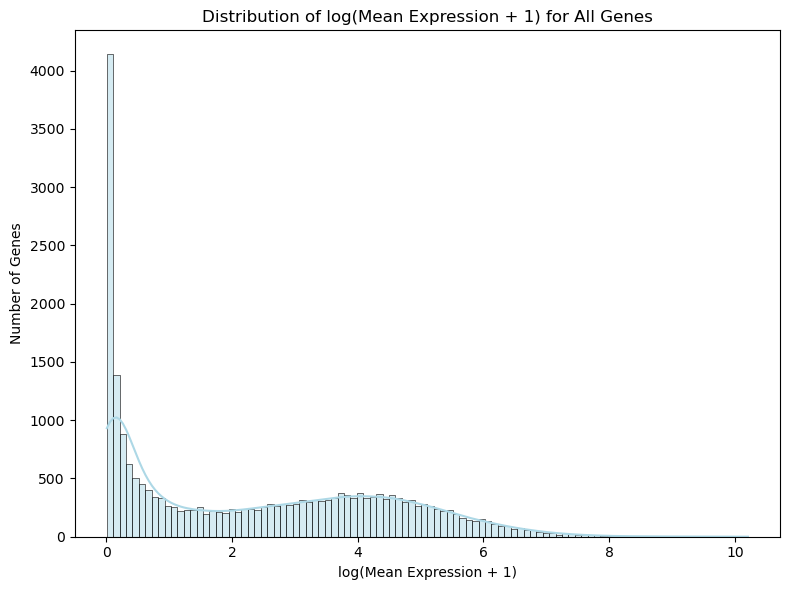

In [63]:
# Create a new column for log(Mean + 1)
gene_stats_hcc['logMean'] = np.log1p(gene_stats_hcc['Mean'])  # log1p(x) = log(x+1)

plt.figure(figsize=(8, 6))
sns.histplot(
    gene_stats_hcc['logMean'],
    bins=100,
    kde=True,
    color='lightblue'
)
plt.xlabel("log(Mean Expression + 1)")
plt.ylabel("Number of Genes")
plt.title("Distribution of log(Mean Expression + 1) for All Genes")
plt.tight_layout()
plt.show()

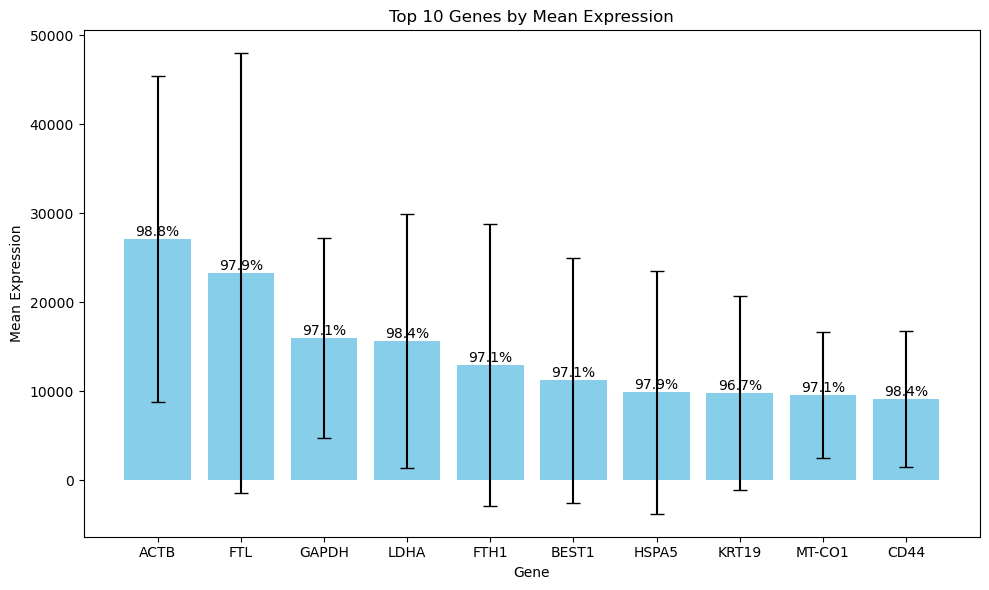

In [64]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

top10_genes_hcc = gene_stats_hcc.sort_values(by='Mean', ascending=False).head(10)

# Create a bar plot for the top 10 genes with error bars (SD)
bars = ax.bar(top10_genes_hcc.index, top10_genes_hcc['Mean'], yerr=top10_genes_hcc['Std'], capsize=5, color='skyblue')

ax.set_ylabel("Mean Expression")
ax.set_xlabel("Gene")
ax.set_title("Top 10 Genes by Mean Expression")

# Annotate each bar with the percentage of cells expressing the gene
for bar, pct in zip(bars, top10_genes_hcc["% Expressing"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/j7/5b4hm05n2r97lqv9v_p_5clc0000gn/T/ipykernel_8084/4020002858.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')


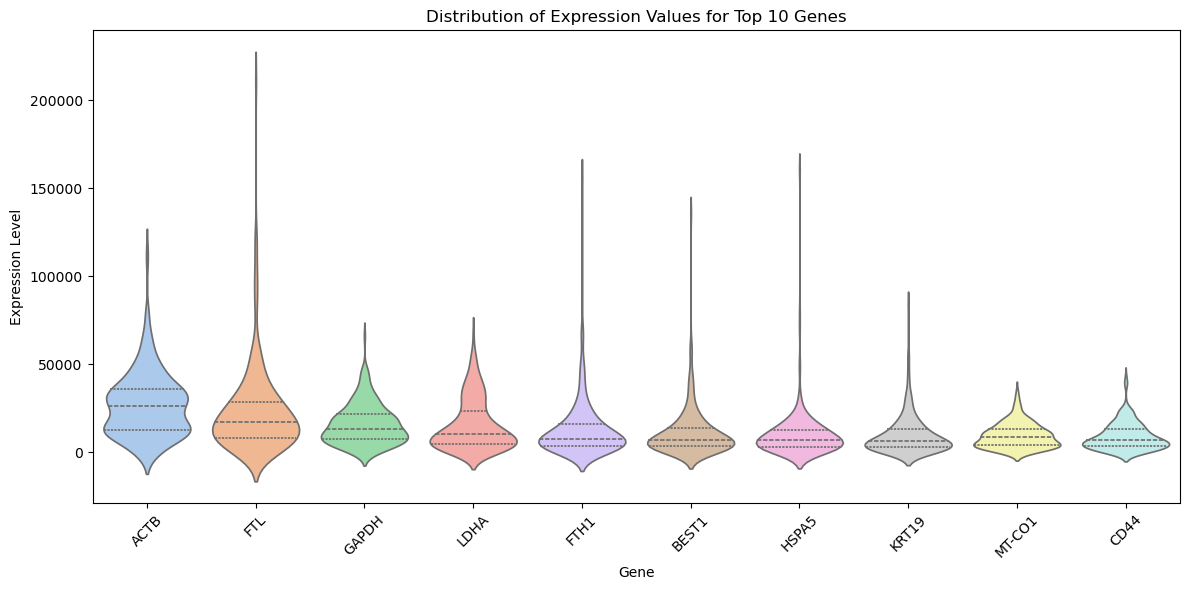

In [65]:
# Subset original data for only the top 10 genes
df_top10 = dfs_hcc_unfiltered.loc[top10_genes_hcc.index]

# Melt the DataFrame so that you have a long-form DataFrame for seaborn
df_melted = df_top10.reset_index().melt(id_vars='index', var_name='Cell', value_name='Expression')
df_melted.rename(columns={'index': 'Gene'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.violinplot(x='Gene', y='Expression', data=df_melted, inner='quartile', palette='pastel')
plt.title("Distribution of Expression Values for Top 10 Genes")
plt.xlabel("Gene")
plt.ylabel("Expression Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **2.3** Filtering Data

#### - *QC Metrics*

In [66]:
# Transpose so cells are rows
hcc_cell_df = dfs_hcc_unfiltered.T

# Compute QC metrics for each cell
cell_qc_hcc = pd.DataFrame({
    "total_counts": hcc_cell_df.sum(axis=1),
    "n_genes_by_counts": (hcc_cell_df > 0).sum(axis=1),
    "pct_zero_genes": (hcc_cell_df == 0).sum(axis=1) / dfs_hcc_unfiltered.shape[0] * 100
})

cell_qc_hcc.head()

,total_counts,n_genes_by_counts,pct_zero_genes
output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,2329439,10796,53.855360
output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,4858841,11251,51.910583
output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,226818,9887,57.740639
output.STAR.PCRPlate1A2_Hypoxia_S104_Aligned.sortedByCoord.out.bam,3525520,7597,67.528637
output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,835249,10136,56.676355


In [67]:
cell_qc_hcc.describe()

,total_counts,n_genes_by_counts,pct_zero_genes
count,2.430000e+02,243.000000,243.000000
mean,2.012306e+06,10330.358025,55.845623
std,1.171858e+06,2260.259356,9.660879
min,1.140000e+02,35.000000,40.220551
25%,9.910625e+05,10117.000000,51.235254
50%,2.067645e+06,10831.000000,53.705762
75%,2.925182e+06,11409.000000,56.757565
max,5.758132e+06,13986.000000,99.850402


#### - Filtering the data based on total count and % expressed

In [68]:
filtered_cells = cell_qc_hcc[
    (cell_qc_hcc["total_counts"] >= 200000) &
    (cell_qc_hcc["n_genes_by_counts"] >= 8000) &
    (cell_qc_hcc["pct_zero_genes"] <= 70)
]
cells_to_keep = filtered_cells.index
dfs_hcc_f1 = dfs_hcc_unfiltered[cells_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f1.shape)

Filtered DataFrame shape: (23396, 227)


In [69]:
gene_qc_hcc = pd.DataFrame({
    "total_expression": dfs_hcc_f1.sum(axis=1),
    "n_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1),
    "pct_cells_expressed": (dfs_hcc_f1 > 0).sum(axis=1) / dfs_hcc_f1.shape[1] * 100
})

gene_qc_hcc.describe()

,total_expression,n_cells_expressed,pct_cells_expressed
count,2.339600e+04,23396.000000,23396.000000
mean,2.037074e+04,104.960335,46.238033
std,9.928471e+04,88.481827,38.978778
min,0.000000e+00,0.000000,0.000000
25%,6.500000e+01,12.000000,5.286344
50%,1.709500e+03,91.000000,40.088106
75%,1.426125e+04,202.000000,88.986784
max,6.350661e+06,227.000000,100.000000


In [70]:
filtered_genes = gene_qc_hcc[
    (gene_qc_hcc["pct_cells_expressed"] >= 2) &
    (gene_qc_hcc["total_expression"] >= 11)
]

genes_to_keep = filtered_genes.index
dfs_hcc_f2 = dfs_hcc_f1.loc[genes_to_keep]
print("Filtered DataFrame shape:", dfs_hcc_f2.shape)
print("Given Filtered DataFrame shape:", dfs_hcc_filtered.shape)

Filtered DataFrame shape: (19539, 227)
Given Filtered DataFrame shape: (19503, 227)


#### - Checking for duplicates

In [71]:
duplicate_rows_hcc = dfs_hcc_f2.duplicated(keep=False)
dfs_hcc_f2[duplicate_rows_hcc]

,output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A1_Hypoxia_S97_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A3_Hypoxia_S4_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A4_Hypoxia_S8_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A5_Hypoxia_S108_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A6_Hypoxia_S11_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A7_Normoxia_S113_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A8_Normoxia_S119_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate1A9_Normoxia_S20_Aligned.sortedByCoord.out.bam,...,output.STAR.PCRPlate4G12_Normoxia_S243_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G1_Hypoxia_S193_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G2_Hypoxia_S198_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G6_Hypoxia_S232_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4G7_Normoxia_S204_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H10_Normoxia_S210_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H11_Normoxia_S214_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H2_Hypoxia_S199_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H7_Normoxia_S205_Aligned.sortedByCoord.out.bam,output.STAR.PCRPlate4H9_Normoxia_S236_Aligned.sortedByCoord.out.bam
PCDHA2,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHA4,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHA8,0,0,4,0,2,0,6,0,0,0,...,0,0,6,0,0,37,1,12,0,0
PCDHGA2,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA3,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGB3,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA7,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA9,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGB7,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25
PCDHGA12,0,106,2,12,0,0,0,0,0,14,...,13,47,18,9,16,19,0,6,17,25


In [72]:
duplicates_grouped_hcc = dfs_hcc_f2.groupby(list(dfs_hcc_f2.columns)).filter(lambda x: len(x) > 1)
# Raggruppa nuovamente per profilo e costruisci le tuple con i nomi dei geni
duplicate_gene_hcc_tuples = [
    tuple(group.index)
    for _, group in duplicates_grouped_hcc.groupby(list(duplicates_grouped_hcc.columns))
]

# Stampa la lista di tuple
print("Duplicate gene tuples:", duplicate_gene_hcc_tuples)

Duplicate gene tuples: [('MIR3074', 'MIR24-1'), ('MIR374B', 'MIR374C'), ('SUGT1P4-STRA6LP', 'STRA6LP'), ('MIR548AA1', 'MIR548D1'), ('PCDHA2', 'PCDHA4', 'PCDHA8'), ('PCDHGA2', 'PCDHGA3', 'PCDHGB3', 'PCDHGA7', 'PCDHGA9', 'PCDHGB7', 'PCDHGA12', 'PCDHGC4'), ('PANDAR', 'LAP3P2')]


### **2.4** Normalization log and Z

In [73]:
# Log1p Transform
dfs_hcc_log = np.log1p(dfs_hcc_f2)

# Print log-transformed data (before Z-score)
print("HCC1806: After Log1p, Before Z-score")
print(dfs_hcc_log.iloc[:10, :10])

# Z-score normalization
dfs_hcc_normalized = pd.DataFrame(
    StandardScaler().fit_transform(dfs_hcc_log.T).T,
    index=dfs_hcc_log.index,
    columns=dfs_hcc_log.columns)

# Print Z-score normalized data
print("HCC1806: After Z-score")
print(dfs_hcc_normalized.iloc[:10, :10])




HCC1806: After Log1p, Before Z-score
          output.STAR.PCRPlate1A10_Normoxia_S123_Aligned.sortedByCoord.out.bam  \
WASH7P                                             0.000000                      
CICP27                                             0.000000                      
DDX11L17                                           0.000000                      
WASH9P                                             0.000000                      
OR4F29                                             1.098612                      
MTND1P23                                           5.525453                      
MTND2P28                                           4.007333                      
MTCO1P12                                           7.462215                      
MTCO2P12                                           1.945910                      
MTATP8P1                                           0.693147                      

          output.STAR.PCRPlate1A12_Normoxia_S26_Aligned.sort

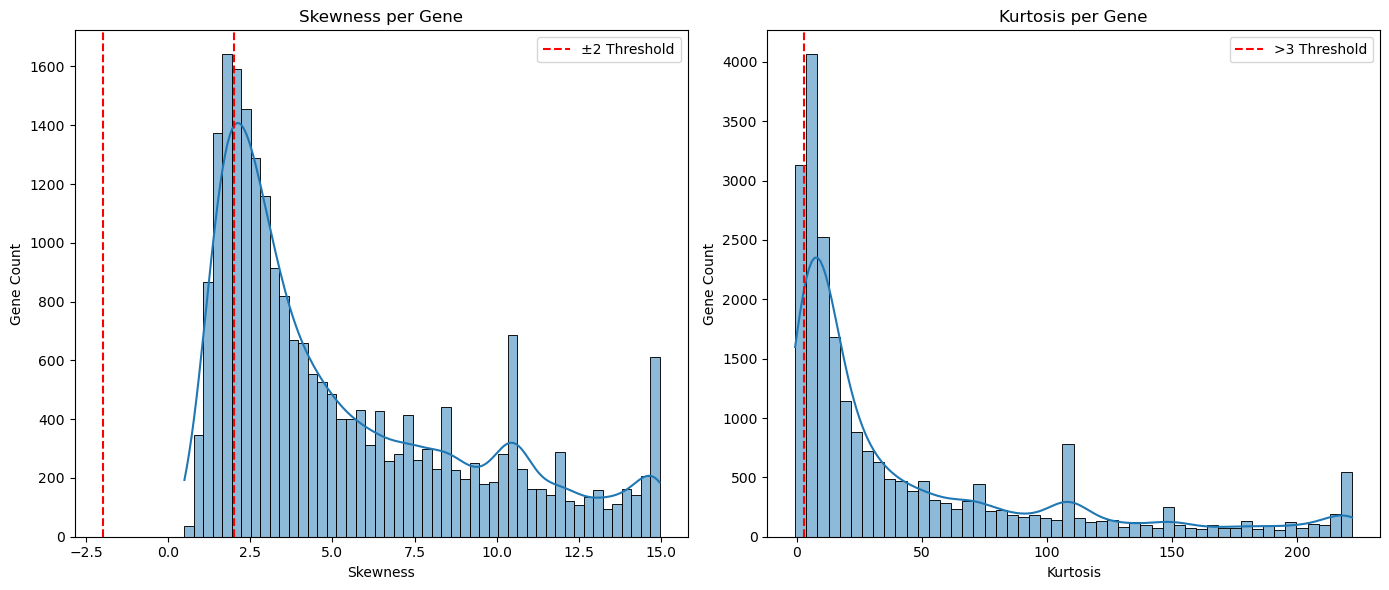

Genes with high skewness (|skew| > 2):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TR     2.690587   9.210228
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[18754 rows x 2 columns]

Genes with high kurtosis (> 3):
          Skewness   Kurtosis
WASH7P    7.645988  60.989386
CICP27    6.180702  41.577900
DDX11L17  4.015227  18.179532
WASH9P    4.314789  21.510070
OR4F29    4.703500  28.408386
...            ...        ...
MT-TS2    2.258065   6.403031
MT-TE     5.552083  50.917196
MT-CYB    1.592522   3.766994
MT-TT     2.507296  10.010172
MT-TP     2.203729   8.170438

[21041 rows x 2 columns]


In [74]:
skewness = dfs_hcc_f1.apply(skew, axis=1)
kurt = dfs_hcc_f1.apply(kurtosis, axis=1)

# Create summary DataFrame
distribution_summary = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurt
})

# Identify genes with high skewness or kurtosis
high_skew = distribution_summary[abs(distribution_summary["Skewness"]) > 2]
high_kurt = distribution_summary[distribution_summary["Kurtosis"] > 3]

# Plotting
plt.figure(figsize=(14, 6))

# Skewness plot
plt.subplot(1, 2, 1)
sns.histplot(distribution_summary["Skewness"], bins=50, kde=True)
plt.axvline(2, color='red', linestyle='--', label='±2 Threshold')
plt.axvline(-2, color='red', linestyle='--')
plt.title("Skewness per Gene")
plt.xlabel("Skewness")
plt.ylabel("Gene Count")
plt.legend()

# Kurtosis plot
plt.subplot(1, 2, 2)
sns.histplot(distribution_summary["Kurtosis"], bins=50, kde=True)
plt.axvline(3, color='red', linestyle='--', label='>3 Threshold')
plt.title("Kurtosis per Gene")
plt.xlabel("Kurtosis")
plt.ylabel("Gene Count")
plt.legend()

plt.tight_layout()
plt.show()

# Print flagged genes
print("Genes with high skewness (|skew| > 2):")
print(high_skew)

print("\nGenes with high kurtosis (> 3):")
print(high_kurt)

The left panel shows the distribution of skewness across genes. The vast majority of genes display positive skewness, with a sharp peak around values slightly above 2, and a long tail stretching beyond 15. This pattern indicates that gene expression distributions are asymmetric, with many low expression values and few extreme high values, a hallmark of sparse single-cell transcriptomic data. The red dashed lines at ±2 mark the threshold for high skewness, and it's clear that a large number of genes exceed this threshold, particularly on the positive side, suggesting widespread presence of rare expression bursts.

The right panel illustrates the kurtosis distribution per gene. Here, too, the bulk of genes exhibit kurtosis well above the threshold of 3, with values extending far beyond 200. This confirms that the variance in expression is strongly influenced by outliers, which may arise due to biological processes (like transcriptional bursts) or technical factors (such as dropout events). The steep initial peak near 0–10 is followed by a long right tail, consistent with heavy-tailed distributions.

Overall, these plots reveal a typical single-cell RNA-seq pattern: asymmetric and heavy-tailed gene expression distributions, driven by sparsity, noise, and biological variability. Such genes with extreme skewness or kurtosis should be carefully examined, especially when used in downstream modeling or clustering.

### PCA Implementation
Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [75]:
def pca(X, num_components, standardize=False):
    # Center the data
    # Notice the axis=0 argument to calculate mean along the columns!
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    X_std = None
    if standardize: # standardize each feature to have unit variance
        X_std = np.std(X_centered, axis=0)
        # Avoid division by zero
        X_std[X_std == 0] = 1.0
        X_centered = X_centered / X_std
    
    # Compute covariance matrix
    # Notice the rowvar=False argument to indicate that
    # the columns represent features, and the rows instances
    # we also need to be sure no complex numbers are generated
    cov_matrix = np.cov(X_centered, rowvar=False, dtype=np.float64)

    # Eigen-decomposition
    # WARNING: we use np.linalg.eigh, 
    # that is specific for Hermitian matrices 
    # (in this case, the covariance matrix is symmetric)
    # this function is more stable and efficient for this case
    # and we avoid complex numbers!
    # It is also much more efficient than np.linalg.eig,
    # it returns the eigenvalues in ascending order 
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvectors by eigenvalues in descending order
    # argsort is not really necessary, 
    # because we are using eigh instead of eig, 
    # but it helps for the visualization
    sorted_idx = np.argsort(eigenvalues)[::-1]

    eigenvalues_sorted = eigenvalues[sorted_idx]
    eigenvectors_sorted = eigenvectors[:, sorted_idx] #The first dimension are the eigenvector themself, the second dimension are the respective eigenvalues
    
    # Select 'num_components' principal components
    components = eigenvectors_sorted[:, :num_components]
    
    # Project the data
    X_projected = np.dot(X_centered, components)
    
    # Reconstruct the data from the projection
    X_reconstructed = np.dot(X_projected, components.T) 

    # Reverse standardization if needed
    if standardize:
        X_reconstructed = X_reconstructed * X_std

    # Add the mean back
    X_reconstructed += X_mean

    # Compute reconstruction error (mean squared error)
    reconstruction_error = np.mean((X - X_reconstructed) ** 2)
    
    return {
        "X_mean": X_mean,
        "X_std": X_std,
        "components": components,
        "X_projected": X_projected,
        "X_reconstructed": X_reconstructed,
        "reconstruction_error": reconstruction_error,
        "eigenvalues": eigenvalues_sorted
    } 

for i in range (1,100,10):
    pca_result = pca(dfs_hcc_f1.to_numpy(), num_components= i, standardize=True)
    print("PCA reconstruction error:", pca_result["reconstruction_error"])

PCA reconstruction error: 87201.05124420703
PCA reconstruction error: 22644.90159209905
PCA reconstruction error: 13757.871597363128
PCA reconstruction error: 10206.928866097354
PCA reconstruction error: 8109.667234428581
PCA reconstruction error: 6548.16571620131
PCA reconstruction error: 5453.011367969839
PCA reconstruction error: 4513.381641073935
PCA reconstruction error: 3856.0131763770028
PCA reconstruction error: 3304.260234910354


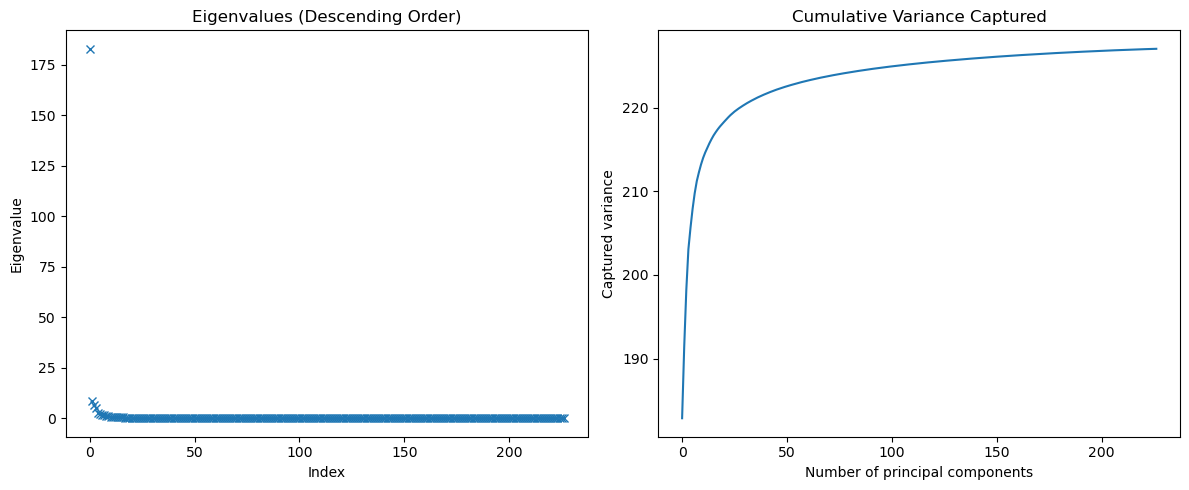

In [76]:
# Use your PCA function once with full decomposition
pca_result_full = pca(dfs_hcc_f1.to_numpy(), num_components=dfs_mcf_f1.shape[1], standardize=True)

# Extract sorted eigenvalues
eigenvalues_sorted = pca_result_full["eigenvalues"]

# (a) Scree plot: eigenvalues in descending order
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(eigenvalues_sorted, 'x')
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues (Descending Order)")

# (b) Cumulative captured variance
cumulative_variance = np.cumsum(eigenvalues_sorted)
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance)
plt.xlabel("Number of principal components")
plt.ylabel("Captured variance")
plt.title("Cumulative Variance Captured")

plt.tight_layout()
plt.show()


## **Step 3** : Unsupervised Learning – *Internal structure of the data*

From this point forward, we use `MCF7_Filtered_Normalised_3000_Data_train.txt`:
- Already filtered to retain high-quality cells
- Contains the top 3,000 genes with the highest variance and low redundancy
- Ready for dimensionality reduction, visualization, clustering, and classification

### **SmartSeq MCF7 Cell Line**

### **3.1** PCA Implementation
Now that we have selected the top 3,000 Highly Variable Genes (HVGs) and standardized them via z-score transformation, we apply **Principal Component Analysis (PCA)**.

PCA:
- Reduces high-dimensional data into a few informative axes
- Captures the main patterns of variation across cells
- Prepares the data for clustering, UMAP, or trajectory analysis

Each principal component is a linear combination of genes, and each cell becomes a point in this lower-dimensional space.

Our plan:
1. **Data Centering**: Subtract the mean from the dataset.

2. **Covariance Matrix Calculation**: Compute the covariance matrix of the centered data.

3. **Eigen-decomposition**: Use np.linalg.eig (or SVD) to compute eigenvalues and eigenvectors.

4. **Sorting Components**: Order the eigenvectors by the magnitude of their eigenvalues.

5. **Projection**: Project the original data onto the principal components.

6. **Reconstruction**: Reconstruct the data from the selected components and compute the reconstruction error (e.g., mean squared error).


In [ ]:
from sklearn.decomposition import PCA

# Transpose: cells as rows, genes as columns
X = dfs_mcf_zscore.T

# Fit PCA
n_components = 50
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(X)

# Store as DataFrame
pca_df = pd.DataFrame(pca_result, index=X.index, columns=[f"PC{i+1}" for i in range(n_components)])

# Optional: check shape
print(f"✅ PCA complete. Shape: {pca_df.shape}")
pca_df.head()

✅ PCA complete. Shape: (312, 50)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
output.STAR.1_A10_Hypo_S28_Aligned.sortedByCoord.out.bam,26.167033,10.810994,-9.247569,7.507115,-15.239871,-6.918042,11.794805,0.695569,7.423169,1.545442,...,-0.049985,6.410214,-1.169498,-5.523534,-6.381501,4.809952,-7.918961,-6.011757,2.549505,3.032894
output.STAR.1_A2_Norm_S2_Aligned.sortedByCoord.out.bam,-30.512926,11.572182,-17.249435,15.394576,-12.641677,-2.522537,-3.247553,-3.406243,-0.552017,-3.934955,...,1.403758,-0.609090,-2.373083,-4.104437,2.398652,0.953465,-1.904892,0.941026,-1.482317,0.832716
output.STAR.1_A3_Norm_S3_Aligned.sortedByCoord.out.bam,-32.173908,-10.474164,-20.668852,3.163732,-3.522280,-5.706143,12.831510,-6.304676,-2.365838,-1.798446,...,-1.104204,-0.356956,-0.486369,-2.862701,-2.093049,-3.050978,-3.710026,-0.996538,0.973168,-0.669938
output.STAR.1_A4_Norm_S4_Aligned.sortedByCoord.out.bam,-35.020859,-6.853679,-12.843840,7.031031,-4.221535,11.610434,8.089865,-8.576648,-10.358920,1.121756,...,-1.438234,0.965879,-1.378829,-0.899584,1.638508,-0.678596,2.221342,-2.127456,-3.533932,1.373239
output.STAR.1_A5_Norm_S5_Aligned.sortedByCoord.out.bam,-33.899330,1.165097,-5.057992,6.236251,-13.922299,4.265460,-2.976688,5.749704,-2.579477,-5.905009,...,-2.713814,-1.805370,0.457091,-1.161040,1.028165,1.117457,0.225727,0.067549,0.165565,-0.361916


In [ ]:
from sklearn.metrics import mean_squared_error

for n in [10, 20, 30, 40, 50]:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    recon_error = mean_squared_error(X, X_reconstructed)
    print(f"{n} components → MSE: {recon_error:.4f}")

10 components → MSE: 0.5469
20 components → MSE: 0.4685
30 components → MSE: 0.4195
40 components → MSE: 0.3839
50 components → MSE: 0.3532


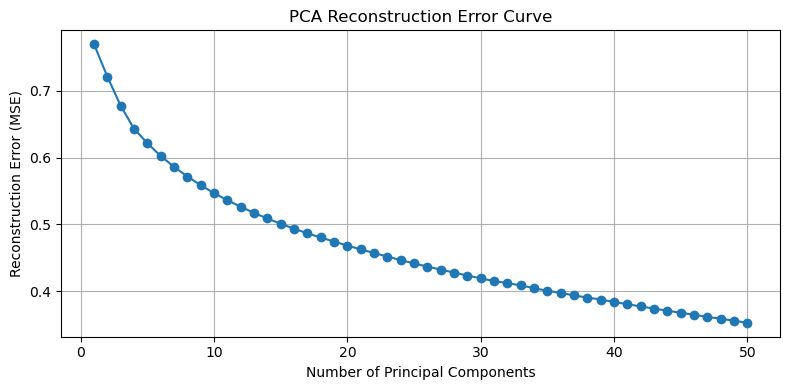

In [ ]:
from sklearn.metrics import mean_squared_error

X = dfs_mcf_zscore.T  # shape: cells × genes

errors = []
components_range = range(1, 51)

for n in components_range:
    pca = PCA(n_components=n)
    X_transformed = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_transformed)
    
    # Compute MSE between original and reconstructed
    mse = mean_squared_error(X, X_reconstructed)
    errors.append(mse)

# Plot reconstruction error
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(components_range, errors, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("PCA Reconstruction Error Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

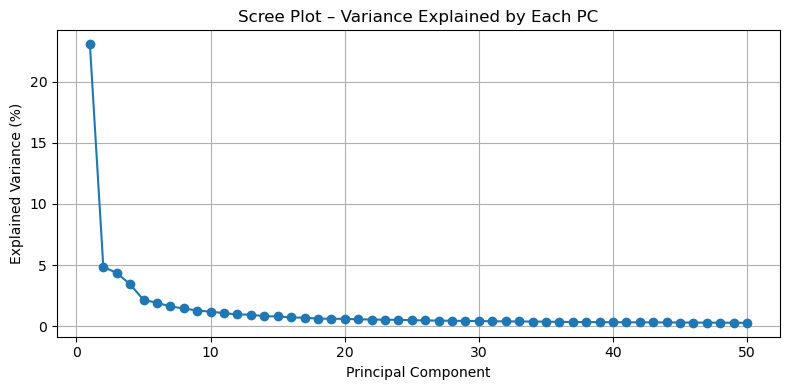

In [ ]:
explained_var_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), explained_var_ratio * 100, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot – Variance Explained by Each PC")
plt.grid(True)
plt.tight_layout()
plt.show()

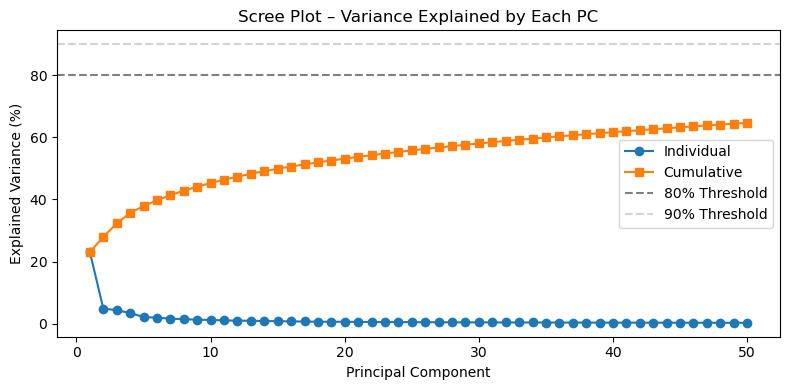

In [ ]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

plt.figure(figsize=(8, 4))
plt.plot(range(1, n_components + 1), explained_var_ratio * 100, marker='o', label="Individual")
plt.plot(range(1, n_components + 1), cumulative_var * 100, marker='s', label="Cumulative")
plt.axhline(80, color='gray', linestyle='--', label="80% Threshold")
plt.axhline(90, color='lightgray', linestyle='--', label="90% Threshold")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Scree Plot – Variance Explained by Each PC")
plt.legend()
plt.tight_layout()
plt.show()

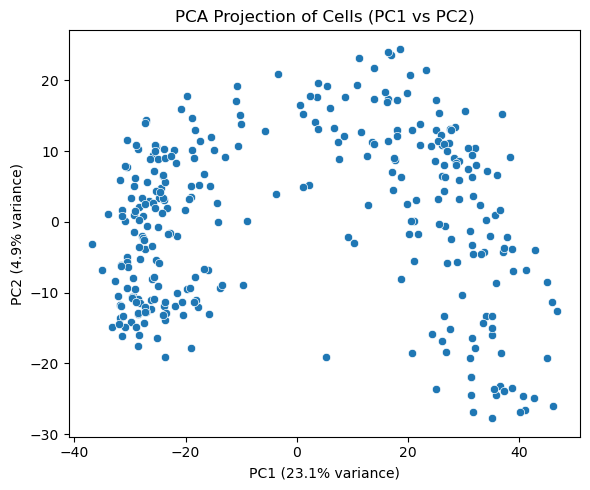

In [ ]:
plt.figure(figsize=(6, 5))
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"])
plt.title("PCA Projection of Cells (PC1 vs PC2)")
plt.xlabel(f"PC1 ({explained_var_ratio[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var_ratio[1]*100:.1f}% variance)")
plt.tight_layout()
plt.show()

#### 🧠 PCA Interpretation

- The **scree plot** shows how much variance is captured by each principal component. The first few PCs usually dominate, revealing major sources of structure in the data.
- The **PC1 vs PC2 scatter plot** provides a 2D visualization of the dataset. Cells that are close together in this space likely have similar expression profiles.
- PCA helps reduce dimensionality while retaining the most important biological variation, and is a critical step before clustering or embedding (e.g., UMAP).

> We now have a low-dimensional representation of our dataset suitable for visualization and downstream inference.

### **SmartSeq HCC1806 Cell Line**

### **DropSeq MCF7 Cell Line**

### **DropSeq HCC1806 Cell Line**